In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [3]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()

In [4]:
len(words)

32033

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
    
#     print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [11]:
C = torch.randn((27,2)) # each one of 27 char will have 2 dimensional embedding

In [12]:
C[X].shape # for every one of the (num_of_examples) x 3 characters we got a row of 2 from the C matrix C[X] != C.

torch.Size([228146, 3, 2])

In [13]:
emb = C[X]

In [14]:
# construct the hidden layer
W1 = torch.randn((6, 100)) #(num_inputs = 3*2, variable number of neurons)
b1 = torch.randn(100)

In [15]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (684438x2 and 6x100)

In [16]:
emb

tensor([[[-0.9015, -0.9714],
         [-0.9015, -0.9714],
         [-0.9015, -0.9714]],

        [[-0.9015, -0.9714],
         [-0.9015, -0.9714],
         [-0.8947,  0.8793]],

        [[-0.9015, -0.9714],
         [-0.8947,  0.8793],
         [ 0.7288,  2.4679]],

        ...,

        [[ 0.4503,  0.2981],
         [ 0.4503,  0.2981],
         [-1.5956, -1.6844]],

        [[ 0.4503,  0.2981],
         [-1.5956, -1.6844],
         [ 0.4503,  0.2981]],

        [[-1.5956, -1.6844],
         [ 0.4503,  0.2981],
         [-0.7967,  1.1723]]])

In [18]:
print('C[0]', C[0])
print('X[0]', X[0])
print('emb[0][0]', emb[0][0])
print('emb[0][1]', emb[0][1])
print('emb[0][2]', emb[0][2])
print('-----------------------------------------------------------')
print('C[5]',C[5])
print('X[1]', X[1])
print('C[X][1] -> emb[1]',emb[1])

C[0] tensor([-0.9015, -0.9714])
X[0] tensor([0, 0, 0])
emb[0][0] tensor([-0.9015, -0.9714])
emb[0][1] tensor([-0.9015, -0.9714])
emb[0][2] tensor([-0.9015, -0.9714])
-----------------------------------------------------------
C[5] tensor([-0.8947,  0.8793])
X[1] tensor([0, 0, 5])
C[X][1] -> emb[1] tensor([[-0.9015, -0.9714],
        [-0.9015, -0.9714],
        [-0.8947,  0.8793]])


In [19]:
emb[:, 0, :]

tensor([[-0.9015, -0.9714],
        [-0.9015, -0.9714],
        [-0.9015, -0.9714],
        ...,
        [ 0.4503,  0.2981],
        [ 0.4503,  0.2981],
        [-1.5956, -1.6844]])

In [20]:
torch.cat([emb[:, 0, :],emb[:, 1, :],emb[:, 2, :]], 1).shape # [embeddings for all of the first characters, second chars, third chars

torch.Size([228146, 6])

In [21]:
torch.unbind(emb,1)

(tensor([[-0.9015, -0.9714],
         [-0.9015, -0.9714],
         [-0.9015, -0.9714],
         ...,
         [ 0.4503,  0.2981],
         [ 0.4503,  0.2981],
         [-1.5956, -1.6844]]),
 tensor([[-0.9015, -0.9714],
         [-0.9015, -0.9714],
         [-0.8947,  0.8793],
         ...,
         [ 0.4503,  0.2981],
         [-1.5956, -1.6844],
         [ 0.4503,  0.2981]]),
 tensor([[-0.9015, -0.9714],
         [-0.8947,  0.8793],
         [ 0.7288,  2.4679],
         ...,
         [-1.5956, -1.6844],
         [ 0.4503,  0.2981],
         [-0.7967,  1.1723]]))

In [34]:
torch.cat(torch.unbind(emb,1), 1)

tensor([[-9.1079e-02, -1.2058e-01, -9.1079e-02, -1.2058e-01, -9.1079e-02,
         -1.2058e-01],
        [-9.1079e-02, -1.2058e-01, -9.1079e-02, -1.2058e-01, -6.4305e-01,
          9.2540e-01],
        [-9.1079e-02, -1.2058e-01, -6.4305e-01,  9.2540e-01, -2.5104e-01,
          1.5556e+00],
        [-6.4305e-01,  9.2540e-01, -2.5104e-01,  1.5556e+00, -2.5104e-01,
          1.5556e+00],
        [-2.5104e-01,  1.5556e+00, -2.5104e-01,  1.5556e+00, -1.1086e+00,
         -2.3352e+00],
        [-9.1079e-02, -1.2058e-01, -9.1079e-02, -1.2058e-01, -9.1079e-02,
         -1.2058e-01],
        [-9.1079e-02, -1.2058e-01, -9.1079e-02, -1.2058e-01,  2.3154e+00,
          5.1048e-01],
        [-9.1079e-02, -1.2058e-01,  2.3154e+00,  5.1048e-01, -1.2148e+00,
         -1.1060e-01],
        [ 2.3154e+00,  5.1048e-01, -1.2148e+00, -1.1060e-01, -2.1194e-01,
          6.2278e-01],
        [-1.2148e+00, -1.1060e-01, -2.1194e-01,  6.2278e-01, -1.6346e-01,
          1.3759e+00],
        [-2.1194e-01,  6.2278e

In [35]:
a = torch.arange(18)

In [36]:
a.shape

torch.Size([18])

In [37]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [40]:
emb

tensor([[[-9.1079e-02, -1.2058e-01],
         [-9.1079e-02, -1.2058e-01],
         [-9.1079e-02, -1.2058e-01]],

        [[-9.1079e-02, -1.2058e-01],
         [-9.1079e-02, -1.2058e-01],
         [-6.4305e-01,  9.2540e-01]],

        [[-9.1079e-02, -1.2058e-01],
         [-6.4305e-01,  9.2540e-01],
         [-2.5104e-01,  1.5556e+00]],

        [[-6.4305e-01,  9.2540e-01],
         [-2.5104e-01,  1.5556e+00],
         [-2.5104e-01,  1.5556e+00]],

        [[-2.5104e-01,  1.5556e+00],
         [-2.5104e-01,  1.5556e+00],
         [-1.1086e+00, -2.3352e+00]],

        [[-9.1079e-02, -1.2058e-01],
         [-9.1079e-02, -1.2058e-01],
         [-9.1079e-02, -1.2058e-01]],

        [[-9.1079e-02, -1.2058e-01],
         [-9.1079e-02, -1.2058e-01],
         [ 2.3154e+00,  5.1048e-01]],

        [[-9.1079e-02, -1.2058e-01],
         [ 2.3154e+00,  5.1048e-01],
         [-1.2148e+00, -1.1060e-01]],

        [[ 2.3154e+00,  5.1048e-01],
         [-1.2148e+00, -1.1060e-01],
         [-2.1194e-01,

In [42]:
emb.view(32, 6) # this does the concatenation that we have done previously but it is more efficient because it does not
# copy memory instead it just interprets what's in the memory differently

tensor([[-9.1079e-02, -1.2058e-01, -9.1079e-02, -1.2058e-01, -9.1079e-02,
         -1.2058e-01],
        [-9.1079e-02, -1.2058e-01, -9.1079e-02, -1.2058e-01, -6.4305e-01,
          9.2540e-01],
        [-9.1079e-02, -1.2058e-01, -6.4305e-01,  9.2540e-01, -2.5104e-01,
          1.5556e+00],
        [-6.4305e-01,  9.2540e-01, -2.5104e-01,  1.5556e+00, -2.5104e-01,
          1.5556e+00],
        [-2.5104e-01,  1.5556e+00, -2.5104e-01,  1.5556e+00, -1.1086e+00,
         -2.3352e+00],
        [-9.1079e-02, -1.2058e-01, -9.1079e-02, -1.2058e-01, -9.1079e-02,
         -1.2058e-01],
        [-9.1079e-02, -1.2058e-01, -9.1079e-02, -1.2058e-01,  2.3154e+00,
          5.1048e-01],
        [-9.1079e-02, -1.2058e-01,  2.3154e+00,  5.1048e-01, -1.2148e+00,
         -1.1060e-01],
        [ 2.3154e+00,  5.1048e-01, -1.2148e+00, -1.1060e-01, -2.1194e-01,
          6.2278e-01],
        [-1.2148e+00, -1.1060e-01, -2.1194e-01,  6.2278e-01, -1.6346e-01,
          1.3759e+00],
        [-2.1194e-01,  6.2278e

In [49]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # for -1 here pytorch infers what should go into that dimension

In [50]:
h.shape

torch.Size([32, 100])

In [51]:
(emb.view(-1, 6) @ W1).shape

torch.Size([32, 100])

In [52]:
b1.shape

torch.Size([100])

In [53]:
# will broadcasting allow (emb.view(-1, 6) @ W1) + b1 ?? 
# (emb.view(-1, 6) @ W1) = 32, 100
# b1 = 100
#  (b1)1, 100 --> when adding this to (emb.view(-1, 6) @ W1) 32,100 tensor this will get copied 32 times and add to all the rows
# so this is correct


In [56]:
W2 = torch.randn((100,27)) # 27 for 27 possible characters that will come next
b2 = torch.randn(27)

In [57]:
logits = h @ W2 + b2

In [58]:
logits.shape

torch.Size([32, 27])

In [59]:
counts = logits.exp()

In [71]:
prob = counts / counts.sum(1, keepdims=True)

In [72]:
prob.shape

torch.Size([32, 27])

In [73]:
prob[0].sum()

tensor(1.)

In [79]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.6424)

In [68]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [80]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [81]:
# ---------------- now made respectable :) ----------------

In [82]:
X.shape, Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [23]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [84]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [90]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
# Never do below three lines in production instead use F.cross_entropy()
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(17.7697)

In [88]:
# 1.
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(32), Y].log().mean()

# 2.
# F.cross_entropy(logits, Y)
#
# 1 and 2. are equivalent. 2. is more efficient under the hood because instead of creating separate tensors
# for each equation it does a fused kernel.
# a. the forward pass is much more efficient because of reason stated above
# b. the backward pass will be much more efficient because the derivative will be simplified
# c. the numbers are better well behaved. logits.exp() can cause nans but pytorch internally solved this
#    by subtracting the max number from the tensor before .exp() which still gives an equivalent output.

tensor(17.7697)

In [22]:
for p in parameters:
    p.requires_grad = True

NameError: name 'parameters' is not defined

In [94]:
 for _ in range(1000):
        
    # forward pass
    emb = C[X] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

0.25361168384552


In [101]:
# playing with the tensor.max() for my understanding
x = torch.tensor([[2, 1], [3, 4]])

max_values, max_indices = x.max(dim=0)

print("Max values along dim 0:", max_values)
print("Indices of max values along dim 0:", max_indices)

x = torch.tensor([[2, 1], [3, 4]])

max_values, max_indices = x.max(dim=1)

print("Max values along dim 1:", max_values)
print("Indices of max values along dim 1:", max_indices)

Max values along dim 0: tensor([3, 4])
Indices of max values along dim 0: tensor([1, 1])
Max values along dim 1: tensor([2, 4])
Indices of max values along dim 1: tensor([0, 1])


In [104]:
# look at logits.max and compare against Y to see why loss can't be zero
# loss can't be zero because we have ... in the beginning and they map to completely different values most of the time.
logits.max(1)


torch.return_types.max(
values=tensor([13.8819, 18.9210, 21.1106, 21.3680, 17.5255, 13.8819, 16.7710, 14.8131,
        16.5614, 19.2740, 16.8058, 21.7451, 13.8819, 18.0764, 18.0122, 20.9834,
        13.8819, 17.3934, 16.1381, 18.0022, 19.2822, 16.8741, 11.6843, 11.3966,
        16.0696, 13.8819, 16.8989, 17.7183, 13.3022, 16.8211, 20.0219, 17.1322],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [112]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [113]:
# ---------------- now made respectable :) ---------------- cleaned up version

In [135]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [45]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [46]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [47]:
for p in parameters:
    p.requires_grad = True

In [48]:
lre = torch.linspace(-3, 0, 1000) # learning rate exponent
lrs = 10**lre
lri = []
lossi = []

In [56]:
for i in range(10000):
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]] # (num_of_examples, 3, 2) -> (32, 3, 2) b/c of minibatching
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())
   
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
#     # track stats
#     lri.append(lre[i])
#     lossi.append(loss.item())

In [57]:
emb = C[X] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3746, grad_fn=<NllLossBackward0>)

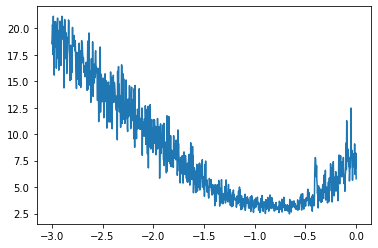

In [44]:
# do not run 
# used to find the exponent for best learning rate
# y axis is loss
# x axis is exponent of learning rate
plt.plot(lri, lossi)

In [182]:
# Splitting the data into training, dev, and test data

# build the dataset function


# build the dataset
block_size = 5 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [146]:
import random
random.seed(42)

# read in all the words
#words = open('names_huge.txt', 'r').read().splitlines()
words = open('names.txt', 'r').read().splitlines()

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

# training split, dev/validation split, test split
# 80%, 10%, 10%

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [147]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [148]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [149]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [150]:
for p in parameters:
    p.requires_grad = True

In [151]:
lre = torch.linspace(-3, 0, 10000) # learning rate exponent
lrs = 10**lre

In [152]:
lri = []
lossi = []
stepi = []

In [166]:
for i in range(200000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]] # (num_of_examples, 3, 2) -> (32, 3, 2) b/c of minibatching
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
   
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

1.8519350290298462


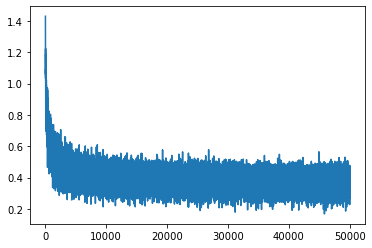

In [154]:
plt.plot(stepi, lossi)

In [167]:
emb = C[Xtr] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0763, grad_fn=<NllLossBackward0>)

In [168]:
emb = C[Xdev] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1329, grad_fn=<NllLossBackward0>)

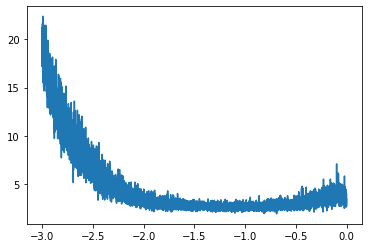

In [84]:
# do not run 
# used to find the exponent for best learning rate
# y axis is loss
# x axis is exponent of learning rate
plt.plot(lri, lossi)

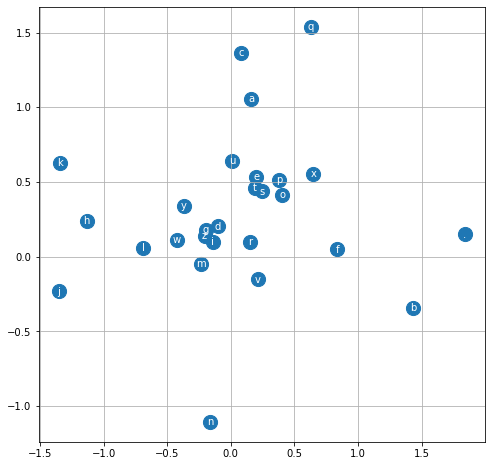

In [169]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [170]:
# sampling from the network before exercises
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d=dimensionality of embeddings)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carlah.
amelle.
khyrilli.
thil.
skanden.
jazonen.
deliah.
pareen.
nellara.
chaiivon.
legy.
dham.
porn.
quint.
shon.
walianni.
waje.
madiarynix.
kaelynn.
demed.


In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
#
# exercise #1 beat loss of 2.10 
#

# Splitting the data into training, dev, and test data

# build the dataset function


# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [68]:
import random
random.seed(42)

# read in all the words
#words = open('names_huge.txt', 'r').read().splitlines()
words = open('names.txt', 'r').read().splitlines()

# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

# training split, dev/validation split, test split
# 80%, 10%, 10%

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [4]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [27]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [49]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [29]:
for p in parameters:
    p.requires_grad = True

In [30]:
lre = torch.linspace(-3, 0, 10000) # learning rate exponent
lrs = 10**lre

In [31]:
lri = []
lossi = []
stepi = []

In [32]:
for i in range(200000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (64,))
    
    # forward pass
    emb = C[Xtr[ix]] # (num_of_examples, 3, 2) -> (32, 3, 2) b/c of minibatching
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
   
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

2.098924398422241


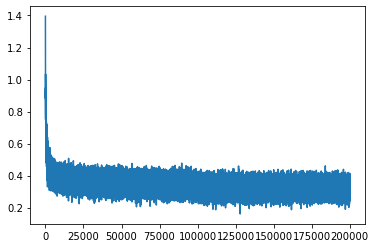

In [33]:
plt.plot(stepi, lossi)

In [34]:
emb = C[Xtr] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1217, grad_fn=<NllLossBackward0>)

In [35]:
emb = C[Xdev] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1595, grad_fn=<NllLossBackward0>)

In [36]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d=dimensionality of embeddings)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmahzabelle.
khi.
mri.
rey.
caspanden.
jazonen.
delynn.
jarqui.
nermara.
chaiivon.
leigh.
ham.
jormiessan.
suline.
liveni.
wavero.
dearynix.
kael.
ivuan.
edde.


In [23]:
# Exercise #2 Initialize the matrices to have network start with uniform predicted probabilities
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)

# Initialize W2 with zeros and b2 with a constant value, e.g., 0.
W2 = torch.zeros((200, 27))
b2 = torch.zeros(27)
parameters = [C, W1, b1, W2, b2]

In [24]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [25]:
for p in parameters:
    p.requires_grad = True

In [26]:
lre = torch.linspace(-3, 0, 10000) # learning rate exponent
lrs = 10**lre

In [27]:
lri = []
lossi = []
stepi = []

In [28]:
for i in range(200000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (64,))
    
    # forward pass
    emb = C[Xtr[ix]] # (num_of_examples, 3, 10) -> (64, 3, 10) b/c of minibatching
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
   
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
# print(loss.item())

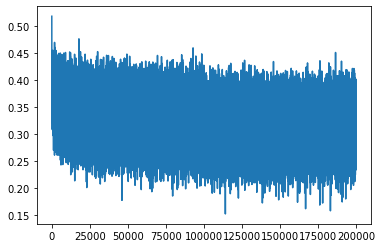

In [29]:
plt.plot(stepi, lossi)

In [30]:
emb = C[Xtr] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0611, grad_fn=<NllLossBackward0>)

In [31]:
emb = C[Xdev] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1246, grad_fn=<NllLossBackward0>)

In [38]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(32000):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d=dimensionality of embeddings)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carman.
amille.
khyrmili.
taty.
skanden.
jazonte.
deliah.
jareei.
nellara.
chaily.
kaleigh.
ham.
joce.
quinthorlin.
alianni.
wazell.
dearyn.
karmen.
dusti.
edde.
iia.
gian.
jasri.
alpaseiva.
husya.
demarion.
ajuejlan.
cas.
ren.
kensa.
luco.
zoe.
sillia.
krynde.
monleynon.
esten.
loun.
ryn.
braya.
kemilah.
brion.
der.
rasisley.
kend.
zakingjaile.
kales.
anielamiteal.
ky.
adyloorabel.
kaiyanna.
darcu.
zainezes.
augelani.
kaerosel.
indoy.
baryiel.
cha.
amryse.
okhnohena.
dayah.
treveona.
lauri.
kael.
mav.
kentzy.
mel.
ryn.
kel.
cati.
sugdella.
jourgenveh.
kayah.
dakarlee.
matisa.
apaitamjani.
thelese.
jaleel.
dora.
hermanuil.
amia.
sammajpoub.
bey.
harlyn.
cherick.
azson.
geverem.
giannia.
rookiel.
davanajene.
aebyann.
jose.
sorty.
faisxiella.
malesa.
tra.
everiah.
zenitearetestin.
malia.
raiden.
maea.
asin.
emmadiered.
iyah.
georgianalendo.
mico.
harmyla.
kayn.
shabturi.
tafariathlynnamira.
kyn.
yayny.
adi.
avin.
per.
yilha.
sten.
abiga.
sadyn.
kalee.
marette.
kren.
siddlyn.
geo.
cariyan

romi.
ezerie.
tyre.
niha.
bee.
khale.
mamiran.
auleigh.
jaxxten.
dentayla.
keas.
camminy.
ita.
king.
riyanni.
soum.
liai.
ayvan.
ken.
cayonncamael.
lamyianah.
mamarym.
elly.
jayel.
cbesa.
miche.
mauraliam.
riani.
ady.
don.
kayzeeisin.
len.
stafiie.
dah.
swer.
jaosa.
jaydannishaylyn.
kempriegen.
zericeoon.
kehaler.
kani.
isadalynn.
sam.
lorennys.
stasiel.
shanie.
fran.
kymair.
shaa.
rhiy.
desleen.
malorya.
akeyten.
on.
calla.
ker.
arkino.
suriann.
davalyfaristyn.
eman.
ryon.
ashlee.
tre.
bareel.
katriel.
selin.
karleigen.
brayiah.
deigh.
jidue.
harus.
rida.
kanziya.
timelon.
kaymaelyn.
zadela.
brathiksele.
sterarrielor.
don.
znivette.
tegente.
davony.
jaleliah.
sten.
amra.
timbernonvwiqka.
clem.
len.
kols.
meenny.
erie.
hukalivarivin.
dommaraequ.
yehkolano.
reier.
mubas.
zeynday.
arouxus.
siddharlses.
troslah.
kamon.
sko.
jena.
archyunired.
terra.
chidir.
sumau.
kowhlio.
johnee.
mariun.
briegon.
gasa.
tae.
pria.
jaier.
zaiah.
mayumayyren.
raxynn.
javia.
dren.
deannor.
domisselextiananyo

blett.
shafiyah.
copn.
jharchson.
mianna.
selle.
ves.
lea.
jamel.
kogan.
cah.
coea.
camislayah.
soliazima.
yilan.
ley.
makobied.
mariel.
raeson.
lateklala.
rylinaana.
eva.
logtorya.
rose.
meiritris.
julycece.
khatein.
zsarius.
adanna.
hat.
tastin.
keisa.
tick.
makenslee.
evethea.
meliannixie.
saram.
gobin.
eddiy.
den.
olean.
kran.
laksharlyn.
leigh.
tetrickilah.
shari.
avesira.
maahan.
kens.
dorandington.
jourius.
beckeliananiy.
savillilea.
reminellisendron.
tiana.
meley.
ana.
avievel.
aziya.
jhon.
keny.
evericbeleidheyas.
yumicha.
peann.
prys.
anual.
orin.
lajarestian.
elayka.
tura.
adalylah.
cle.
vaugushirah.
imarna.
juliot.
kmativieah.
lep.
jasacler.
ijcanishne.
gael.
kai.
almarioliamar.
daylandulianuet.
azar.
nyie.
esion.
arma.
shazen.
antuklonda.
sart.
naleigh.
ott.
lafin.
olutrigon.
jerrudraida.
ada.
jakarmeryn.
caleen.
dhraidi.
yylienon.
alee.
jakyrenaiah.
mohi.
wish.
rhy.
ayilianashrion.
amelin.
devince.
kaleghyann.
jaryanna.
harlen.
ayiah.
alle.
tymi.
kase.
alano.
kisaya.
swho

ariiana.
aidyn.
saquavi.
kahmadie.
alih.
tslin.
zaindie.
isai.
carpanthealeighten.
aroonickaise.
ara.
bastinerami.
rawlett.
gifa.
atta.
ocy.
wise.
kenzleie.
kayden.
charahia.
gwael.
harlaa.
yabian.
thika.
silvin.
regoe.
eem.
damthon.
dudie.
eve.
shaydon.
yayne.
kotollyn.
damero.
horalliannistafye.
kalya.
lil.
kajie.
alee.
blandr.
raela.
kidohnn.
thee.
emeli.
grince.
bob.
brah.
bren.
mikancie.
shroxanya.
anthi.
deroruvianavelinkeyla.
brooklavaneline.
srema.
jouri.
ala.
devan.
loc.
tara.
adell.
brince.
knanica.
mara.
omeia.
meron.
kael.
jenariara.
emie.
akira.
cayerany.
malaykelandre.
see.
amart.
benoda.
thanna.
elmise.
jameryena.
wester.
ozori.
consta.
arline.
yordi.
yal.
chuel.
ella.
addy.
kasyone.
joovari.
kaore.
camli.
halio.
makayde.
alin.
corbert.
maline.
monie.
robi.
maziah.
ferris.
isa.
shil.
fin.
kaua.
hanfareem.
maeriny.
christalexyanna.
laanriel.
colianna.
neko.
ori.
malaitzalayaan.
cyn.
brylyn.
brysha.
itza.
priyah.
galianasinate.
livel.
wilyn.
alexan.
xzahi.
jakaie.
arran.
k

julianaylen.
kelicaji.
chelsin.
avionon.
kailadlee.
jovana.
bron.
rivataznieppdagha.
onnieller.
eve.
someia.
pailee.
bree.
zal.
tren.
dedly.
jamaralexiama.
aal.
taemari.
kha.
trachette.
jan.
beth.
lilee.
camyah.
sibgon.
sime.
shiaa.
tyrel.
kai.
radleighden.
brit.
temen.
aharlen.
elo.
jemshlad.
maiya.
evalid.
nor.
wil.
jami.
emshlvinia.
tyse.
san.
naiaynor.
dafien.
jahsen.
krystuijoni.
anarissiye.
emmatton.
jesabelyn.
aiyaoluwa.
eden.
jazzon.
kham.
arion.
yud.
clan.
ayshawyn.
luizeridgee.
van.
nyja.
moide.
deanaylah.
doya.
augurrio.
sha.
gulyn.
char.
lexiessa.
jaydo.
siysan.
ziyal.
isadilanni.
kary.
paliyah.
eymanah.
kamarzolet.
latou.
zakody.
amni.
houn.
chaysa.
dylara.
charimousla.
matturiam.
khyan.
meco.
rayna.
riya.
christely.
vairana.
ella.
tiylos.
yadashi.
alij.
rhiann.
lin.
row.
anjotiniah.
khekiailtonahivaleney.
auson.
tra.
yamenzayladipa.
lamelio.
sogen.
royalexlie.
elyn.
welty.
naylinn.
jers.
kelbanithianie.
christon.
maaha.
ewous.
zolyn.
kaelynn.
kaviel.
cherie.
cata.
dinson.

nolen.
channeth.
hard.
cos.
aun.
hida.
zadva.
daeard.
zalisxliett.
ros.
arie.
ros.
yomi.
lonte.
lenie.
dayten.
avie.
emieana.
karlyn.
caye.
keon.
juliorya.
shayly.
wardolrichetrajyoxadelynn.
ana.
lah.
imanuithana.
keless.
vice.
caleyarric.
jahkington.
ruse.
dan.
lakseeir.
jamario.
leo.
deving.
milianiyah.
lyvikeny.
she.
lochrisce.
dar.
alianna.
pian.
land.
tali.
bryse.
cariserentm.
elianne.
deannie.
makayla.
nella.
yanson.
evan.
jenni.
aylee.
frutesley.
lai.
erice.
crue.
damirdi.
jerelyn.
joand.
lena.
lian.
tre.
lea.
lenaida.
eeves.
ircadys.
sionna.
amarla.
joheina.
sher.
xine.
afkingiel.
cristavie.
cher.
ezi.
prin.
elia.
jermisar.
minte.
josna.
syila.
riddin.
ryleilahna.
kalvi.
oma.
mikaylanierret.
vion.
adatie.
chane.
franda.
jerardykynzihamie.
cypra.
nalise.
khellowhe.
wilb.
arwoton.
mailyn.
kharius.
remillyn.
princherhon.
alenayann.
quralynn.
brianni.
ayzon.
sabegan.
prelle.
jakiylerick.
makhirat.
tziga.
jasachar.
sah.
iree.
brayleen.
tashviyon.
zakynley.
zer.
teina.
pain.
amari.
n

jaiereziya.
hidi.
marizana.
leowya.
jah.
taleney.
crialeigh.
jaceonys.
lys.
riy.
mercaracy.
engi.
fel.
ila.
bytriniah.
rob.
analis.
ran.
tay.
paitembrey.
jazariha.
kaihi.
seley.
alya.
edor.
oaya.
hademoniah.
doryianyi.
mahima.
siren.
yous.
kyno.
akyla.
allenne.
trel.
emon.
matt.
petkylina.
gamon.
dulianna.
monstenofenn.
derrysharamza.
auden.
jamir.
makel.
sully.
bryef.
tralee.
rose.
nee.
sheden.
rhille.
nigarell.
kathanaven.
caisder.
deniya.
demari.
torustiarakaelangelin.
dema.
sola.
symee.
lexxandroze.
navia.
kentle.
leigh.
zakidbmie.
amonan.
japonecka.
hamee.
jamai.
emmiriel.
xzayolettalina.
lean.
dai.
dos.
samiranda.
issa.
rudra.
sofinnika.
jani.
adrin.
zepper.
maddyx.
tydon.
amiel.
rrelliyah.
rainret.
ella.
malon.
git.
lackenoani.
tamiri.
kies.
beovotsabelseya.
iwerrah.
sawaliani.
amersen.
carrett.
yadiel.
jacelija.
aralynn.
taryffe.
dawai.
hush.
kaiyah.
dan.
jani.
astino.
khalon.
samayyree.
caldenna.
jayse.
sammyeawan.
aldoron.
abetuer.
nahzi.
kileancecp.
man.
kal.
wah.
kis.
azo.


iveah.
ali.
ellare.
leon.
siyah.
amauralle.
krishawdianneraehmairon.
dan.
tayla.
krer.
kwahdur.
matielle.
khyeer.
azayissel.
brigh.
adil.
kany.
zaeland.
janoltus.
blanna.
kata.
ramodt.
lamadi.
kobidi.
oeralee.
harlei.
kisaary.
siyannerna.
vere.
jaylan.
eky.
erea.
ismanurvevanna.
casia.
jana.
colisa.
amravizessanje.
ain.
aley.
abelane.
byl.
lovest.
brensilb.
alesly.
taheli.
eshanceta.
orfia.
shanick.
mjuyn.
jison.
kameylanex.
milloxia.
odi.
teailynn.
kalexan.
jedse.
promi.
dakshaita.
hanalez.
daivia.
avanell.
niscee.
yamerylie.
ramellotuk.
luxandrenley.
sebulan.
aristo.
averys.
nichenlee.
elee.
tomi.
callewesley.
eus.
alo.
ness.
daxm.
joann.
sulin.
jayla.
xad.
unley.
olan.
izette.
kard.
abduleighton.
ryn.
lendryn.
draelen.
men.
ani.
aleigh.
las.
evayverleil.
king.
chesh.
skahir.
marbo.
lucrynli.
leanna.
yepelyn.
justaya.
keronix.
aveon.
dre.
meyah.
kaliqtowryn.
brixe.
lanim.
kna.
sandiano.
tofat.
marsh.
zameu.
maudika.
xadhuhony.
astyn.
darli.
sulik.
zomi.
romi.
teley.
dema.
kloni.
lebi

wayna.
eza.
elen.
yera.
madd.
kanna.
helyssai.
krie.
sjamaya.
gaxlyri.
liasiga.
anka.
chann.
zulaykaly.
liandreak.
sabin.
zeie.
bayley.
dilynne.
karly.
imo.
samirii.
kesce.
clezeka.
tay.
akyreh.
aita.
rud.
dam.
miha.
zejaari.
darith.
jacie.
ausreoluwa.
gurna.
jayed.
kim.
harie.
jah.
mira.
gite.
lucrislee.
aiz.
abielse.
lucelevin.
hid.
jaco.
marqona.
mareonuvi.
ryn.
nazari.
gillia.
dayiah.
maisyn.
paylah.
rei.
zajiana.
cadi.
ell.
eli.
sofaustycle.
delyan.
ger.
demel.
roiernesabell.
giulayo.
anna.
helia.
malah.
kywen.
ron.
namtamardetar.
jacthonyylee.
bevan.
jery.
lari.
rivine.
riggorhyema.
ila.
kennell.
jossey.
marl.
kelyssa.
ryviannestalleric.
otolivonni.
kemi.
man.
abellayn.
mayah.
alliralezy.
kayna.
xade.
eimoni.
atlaelynn.
dalah.
alyn.
meroselvelle.
yah.
novanley.
andreyarleese.
akul.
villie.
das.
nazmias.
maddi.
dalyn.
bar.
alvehasna.
eusephani.
hel.
lee.
ann.
lyn.
milan.
cier.
lynne.
mayson.
hamael.
klohenai.
mess.
darsen.
kyanaanva.
dem.
nioluwatlourin.
natel.
zaelynn.
nami.
audu

ram.
trixter.
mar.
rami.
ayiteagaks.
talynn.
kaminton.
charielynn.
amoun.
seliah.
laysa.
caniy.
miko.
khland.
whelalie.
beovemianngelian.
jakane.
dan.
dah.
kela.
yovaleigh.
cza.
jallymiri.
maizlerin.
harlynn.
merenylah.
riya.
keyza.
aroshuntasl.
briel.
ioy.
mikkayse.
leston.
manlee.
momanuy.
kacetchery.
adee.
meremyn.
spyldenir.
karmauriy.
mel.
farterion.
ahris.
roshirinna.
begh.
stephan.
exer.
kimalex.
avanni.
chan.
natalyn.
jaile.
damarickerry.
evahliz.
maizo.
savy.
soley.
speram.
ajeamito.
asan.
oni.
royjani.
jayseemontlynn.
daris.
meeron.
worsavanny.
ritza.
tah.
ruby.
shurie.
kion.
abdula.
jah.
embryle.
cambrings.
emmilee.
briel.
ahaverleon.
bemdeha.
basia.
sar.
avashris.
hayshontley.
teigh.
zaya.
taia.
loual.
motleon.
kendielor.
amonie.
led.
talih.
aison.
zah.
anby.
farkeyan.
matlison.
hil.
emmyenna.
tmie.
dem.
kiya.
emiydhannessa.
nyanni.
tumobe.
try.
becklamir.
kai.
slakeen.
jetnseroyaquan.
rominharlo.
mareil.
kourn.
jaki.
behrishagdi.
kentzelyn.
malan.
tema.
alyz.
ana.
gentza.


brijasia.
adorez.
kion.
nai.
dezielin.
alori.
nayla.
maxelina.
ahkia.
brylon.
jole.
kharoey.
herreon.
aleigh.
erianna.
kona.
tuhal.
gravvikunalairily.
emya.
mebraymaesonna.
moriel.
keia.
lillaice.
calee.
riyay.
moremitrinde.
kylien.
adaldreya.
omanya.
halie.
yugenellyn.
nola.
jaylandryyon.
emi.
mail.
sticayleyzamar.
aknishonika.
lyz.
ber.
rudamarination.
kali.
alena.
sum.
ani.
elisender.
brius.
sanverleighten.
samika.
wrig.
gio.
iviya.
yiqa.
adreyana.
mazille.
leah.
jakiyah.
and.
kahliah.
jus.
bellisandersyn.
ved.
manyahasueliya.
misia.
tarlee.
zan.
laina.
vodingan.
mus.
tahakkio.
nevayah.
mahariah.
nicaannce.
graxfara.
eelande.
benja.
ler.
joneeera.
avra.
greilah.
viknheoment.
bris.
izzocklamir.
karyake.
damila.
rafa.
danceton.
ricken.
keia.
krista.
adrieley.
amarris.
viellabib.
kary.
lova.
malhememale.
oluway.
horni.
gres.
budlyn.
kammaristyel.
aryanny.
haydenicton.
sayelian.
keas.
ven.
nimohan.
spoostyson.
ton.
ameryn.
lavarette.
diighan.
nan.
mccyana.
wyn.
stefa.
arty.
anuliyana.
d

raison.
ladie.
deorde.
madaydyn.
nolivithaelaysiquelena.
a.
dayre.
malayah.
utzalaikeelia.
ven.
tani.
tema.
golie.
lel.
miko.
enie.
nata.
elyn.
zaironi.
joand.
emrnia.
kello.
roya.
correx.
wentreagi.
undesskiress.
rosen.
nur.
anssef.
cary.
wilyn.
aleig.
dreera.
damazian.
nolo.
chree.
nixania.
darrio.
mery.
leomar.
skylah.
mebo.
ryavarne.
turrielia.
preshia.
daler.
rhid.
zari.
zymirah.
syan.
rheavead.
jav.
dai.
let.
jalyn.
amordavion.
aland.
yum.
mylaniquelleighin.
alandy.
hollxa.
jeanro.
wysin.
kirs.
jan.
laaraju.
joee.
kamir.
kashalen.
jes.
lum.
ren.
zia.
kadhel.
nohenanalice.
aliya.
colin.
gruennosten.
macie.
yesn.
ora.
bretsbarry.
esh.
sergreya.
ale.
ozeyeniyah.
jcen.
larett.
mora.
hemalil.
dania.
cclnden.
asleen.
elin.
ani.
thi.
amariah.
navenia.
jaconnal.
avrea.
jennie.
reine.
verson.
yadhaida.
remaji.
valin.
ziah.
shurcushiven.
willia.
aler.
holli.
levabridiner.
draxtelverri.
katiigarrea.
korian.
iryn.
asharionna.
sarun.
ketamillio.
kaihan.
dhristir.
casie.
mania.
mar.
adeak.
aud

kaisler.
madiva.
dudis.
sha.
jaide.
paser.
cela.
makirafatquina.
haz.
amariah.
rica.
kema.
ryley.
mili.
dhye.
diyah.
madd.
mihan.
amen.
sadisaimi.
ney.
areya.
isen.
soless.
zeperzen.
nalaynishawn.
grykaylanie.
oriewere.
sabelle.
be.
jaskharbanna.
annina.
jura.
srosellelyne.
kahi.
phear.
jaymahavelle.
wezmar.
oluwat.
shea.
ford.
kaycier.
samaras.
maxain.
xrianarce.
mari.
amirathrone.
yorayairennalisaesolie.
samina.
avier.
noah.
novaniyah.
gereshawn.
brae.
darie.
lamy.
adra.
cebavtuman.
ciellan.
jamison.
nivalayne.
dena.
michalina.
dee.
sha.
laqinv.
clenna.
tarsir.
mali.
jemarahzey.
seva.
jaco.
modson.
yavarie.
kylo.
shyfimttorris.
fili.
tsen.
ayley.
lofendra.
salaydon.
roz.
kalish.
ram.
zulie.
amyssa.
ace.
brigh.
eller.
jha.
kion.
kiya.
abia.
kaylah.
amario.
anva.
ismery.
whiushi.
zahristalyn.
gadiya.
makarmanaayah.
zell.
jela.
mely.
san.
lilandricelenny.
hat.
vican.
reeka.
aad.
stalcedana.
zanyiry.
don.
jotina.
breen.
jah.
tarlow.
ossly.
kyan.
juel.
marqusto.
zylaynu.
lakaram.
sumohan.

han.
emeliann.
meren.
siraivelyn.
nica.
mahana.
preslauriell.
panna.
laudalaileen.
sumarianna.
khentzi.
zoraylora.
terly.
zivan.
lin.
weaides.
harleiah.
zylit.
dino.
burkyley.
jotolyn.
keosann.
hocpso.
rhiel.
orenne.
rarista.
chrolliyant.
maloostin.
ela.
ayz.
daysineon.
nic.
stessy.
moni.
cedadedonachelin.
den.
ulyss.
sham.
ravie.
ella.
rut.
ally.
benyx.
mathie.
leimir.
adedon.
eriyah.
giana.
duhc.
jinna.
remili.
erie.
cabihi.
stora.
savonte.
hana.
amorina.
jaymie.
chettbinyke.
yiyra.
nyfas.
jemila.
zoriah.
dalee.
lel.
yaliah.
clari.
anunes.
jermanon.
harlinnstorriston.
tedreveerazon.
skylum.
lilee.
joratiaryshon.
dareth.
tyraelisabella.
marian.
airs.
kamonte.
rus.
kall.
maryph.
geo.
telumini.
ston.
zhyliam.
nzieraelesse.
del.
brexker.
telle.
myah.
ant.
jonna.
ella.
kea.
bone.
kashdenleigh.
krison.
tafati.
jahdammontalenairi.
muheom.
heion.
cateagahni.
alei.
emerissa.
amina.
geirielija.
pertesliya.
jeper.
euto.
sand.
mastorencallian.
wamoam.
jose.
lor.
wily.
maxlynn.
lene.
amika.
ericy

eliz.
melmin.
juinton.
anella.
ziah.
yod.
travisha.
jazimree.
ger.
zindier.
dhy.
rushiva.
caley.
kirahliah.
natus.
bric.
eva.
joriah.
leiaulandiah.
callie.
graxthan.
esza.
mer.
kailee.
faila.
rasdah.
rae.
nolusteph.
nazi.
korrick.
kamse.
gia.
weniel.
hen.
nav.
addy.
nino.
dadin.
amora.
gracey.
keiah.
silvui.
mara.
eelynne.
bryddylyne.
alvin.
ahni.
gib.
aliam.
kodelean.
per.
abdiq.
lle.
laiten.
gern.
enz.
kainaceetley.
keer.
erishy.
bilanna.
kamyristef.
cora.
dylah.
aareagabri.
shendelani.
deson.
kal.
eshakandonnamse.
andreus.
tayter.
bern.
edrice.
ley.
mla.
mus.
maycoalma.
nasoup.
jacy.
jah.
deveer.
rai.
ossidra.
kena.
emila.
peraelyssa.
akiesha.
jah.
kenzahmiarosal.
silahne.
herdani.
konnadyl.
evellari.
zamani.
radyah.
santh.
marius.
deakaishai.
sulheyan.
juvin.
benne.
lindinad.
mcki.
adyper.
haree.
solasoi.
davenia.
krusid.
ren.
aiyan.
don.
stap.
dajveres.
isi.
kovanoumarson.
aariah.
jssa.
mahlan.
bryah.
maxima.
omi.
blany.
carzameer.
sady.
sarweny.
eston.
laja.
rudeliah.
joddy.
brue

aishawn.
leien.
cyan.
taviyahjadythylinte.
leianna.
aven.
avnoxr.
jula.
briiny.
jehla.
branci.
yannin.
dontselayda.
dencedy.
kanyeon.
may.
laius.
melia.
kyleeanaia.
aviani.
moedlandreaom.
hayliyanalex.
iziah.
jaidin.
adleynon.
mona.
kes.
zande.
nevand.
zsunn.
demanvik.
maley.
atie.
annikhlee.
hawn.
madalyn.
arsyn.
rahanna.
alendanira.
ori.
ailyssa.
fred.
yugraclari.
monia.
olim.
kashmoney.
abriana.
celia.
merae.
kasharujl.
khyriniti.
luwalde.
shamilenyarionne.
kioranyla.
brie.
andiel.
rigberne.
krezyn.
vedatiginiora.
elia.
dore.
miki.
bece.
jean.
elynn.
izeann.
noy.
aschella.
sahira.
jhoddychelijxin.
gen.
xelander.
jaida.
ezabellana.
ima.
aubrenyxiolie.
zharlee.
nemalaya.
dhael.
keroryng.
leigh.
felany.
krena.
elin.
prin.
olo.
graiyah.
arra.
joysa.
rudh.
khi.
char.
adorynn.
kinton.
joella.
darrianoma.
naki.
leen.
anel.
carrisham.
zay.
corin.
vivonmvere.
rei.
jashyana.
fedhiyo.
nataf.
ambristin.
rahya.
cassa.
emman.
dejic.
elishan.
man.
furonalia.
ram.
dayeth.
chrisha.
aveeriesh.
trisha

lunna.
jeff.
fia.
tomi.
huck.
wayleen.
jenixiel.
nandhorre.
nah.
aron.
migracie.
neah.
ley.
jozikianne.
kiyla.
blaykynn.
jerista.
monta.
fari.
mori.
labeesa.
brog.
oluwaela.
nhye.
jami.
paynana.
bronith.
colet.
jule.
arly.
adailio.
dora.
anlee.
gay.
mikisa.
rando.
elven.
janif.
kenda.
tatima.
nix.
elina.
bristetta.
gil.
myra.
keah.
domora.
nike.
mariect.
zayla.
krishker.
anna.
viya.
jailcie.
maqean.
disami.
zandi.
gurney.
alty.
tanvee.
kadychila.
be.
jacc.
tameah.
sta.
ariell.
vert.
zakger.
ahya.
ram.
tylansila.
sedemine.
mailah.
joysa.
naz.
anxon.
ranton.
geora.
zeb.
oana.
emy.
brigrely.
cyonn.
lissa.
jenit.
blani.
adaudraydon.
imo.
soveliana.
buxrah.
jetsemil.
daxvandiel.
ristyn.
elvon.
ksa.
ritzandiko.
kesor.
emela.
nix.
kemonie.
aal.
jaquaulani.
quona.
jahelamina.
dey.
sher.
selionmurwen.
yan.
jaidy.
tedynn.
ewoes.
chrie.
karmihania.
mid.
marletzamoresline.
natana.
axton.
graceleyonnie.
jordan.
amiyah.
naylena.
lora.
arly.
nasliton.
bryah.
dorizaha.
payniyah.
ontae.
adalintoniya.
a

jalvi.
adie.
kaire.
adesa.
ormi.
zayniya.
lorendresly.
keimae.
dani.
randi.
jadevyn.
troxayzee.
odhyiaan.
lamarviyah.
fyleria.
fina.
mcco.
adpneosantijuriel.
jedan.
maire.
munayaniya.
krora.
alphermani.
lai.
adriekensen.
kimbyl.
carlowhet.
reya.
dan.
aan.
geo.
verlee.
kalea.
imyasmoni.
suna.
len.
viralvai.
abrinconn.
camilora.
karmaie.
freina.
noonalaine.
siyani.
lyli.
nico.
fincelsi.
kenaleya.
than.
haidynn.
adah.
mick.
auri.
tomen.
egan.
larshituysond.
ryler.
cand.
dedieghbe.
leighteney.
dima.
tamaria.
markko.
link.
hila.
milence.
rim.
maleian.
bryleean.
dawalol.
gid.
man.
sece.
hollyn.
ohmy.
par.
go.
marey.
krene.
katobiganachant.
saul.
breah.
kene.
ameltesne.
manishdy.
kent.
jaquah.
ediaelynn.
yaria.
nohella.
avishazi.
amana.
zelu.
edia.
yalan.
taian.
astokela.
leianna.
airo.
lex.
kalarieth.
bert.
mahura.
yayleysonte.
pari.
jolettealyn.
ric.
dunoxvorier.
illian.
voles.
lee.
anvikhni.
didon.
tademose.
lora.
amariell.
rysty.
fioliya.
linka.
zakhyan.
zim.
ablo.
xadi.
jalaine.
emelani.

elia.
shancen.
maylia.
andeline.
zandaley.
adonny.
taxn.
jakailyn.
dula.
arielle.
kend.
chry.
jaxa.
everi.
jasci.
chryn.
alix.
pranclerah.
radleigh.
ilyanna.
jiham.
huneb.
zin.
scotin.
stenley.
kavik.
izrahi.
kio.
ada.
yeira.
rean.
novanderel.
faily.
tawi.
raida.
bara.
july.
col.
aftariby.
ryla.
baylia.
adiyn.
bente.
grianni.
westa.
ramely.
gian.
alon.
bena.
roming.
melise.
fariyan.
cani.
elyne.
naeal.
nys.
alany.
dan.
atalle.
raylynli.
lam.
alce.
klohibovon.
elon.
abigusteliana.
jonzu.
syen.
kaize.
bel.
alabelle.
aizeanciemaithah.
zijana.
oleneed.
laizon.
khubrouelle.
aalia.
daclarycion.
maryah.
ali.
kugill.
ker.
kavia.
gaylah.
ruqtenna.
rherelle.
jersouldi.
zahincle.
yara.
sabellyah.
codianashnahtkela.
alore.
male.
aalairlabel.
lah.
leya.
hanne.
nivar.
yaxidohbna.
amy.
muhaelynelle.
raiyah.
naniah.
bryn.
haddy.
joh.
jamarius.
jashyck.
kacia.
adianna.
welyn.
kofeolynn.
remiah.
lizain.
jay.
crynn.
alei.
milley.
morah.
dann.
ken.
rashaf.
purie.
samaziona.
toluwabjlan.
selin.
domaelyperd

irlee.
clowajiheate.
mucetim.
grenzishvin.
athi.
jaosi.
kashany.
dha.
sumaida.
maliah.
blesena.
sev.
dekjakaronette.
jalyn.
johaisleyemilani.
sujaela.
olyn.
colsigan.
anal.
abdik.
fraileigh.
dean.
roey.
avani.
masel.
nah.
kawinleondelicramire.
vav.
ana.
skylyn.
delmore.
kelee.
mackoy.
xartavits.
rozie.
aubriteagentres.
kya.
ken.
leeno.
solas.
avreeling.
boy.
joya.
kham.
damarkota.
xylin.
sten.
pier.
chriylia.
sajistavihasperron.
zhelachelan.
yan.
dylieice.
ariya.
alyanna.
thi.
solettie.
aneer.
emma.
cie.
athla.
kynn.
jaleigh.
kaeli.
don.
finstomaryiana.
dako.
emer.
jurrien.
chayaa.
sber.
bence.
illio.
ezrriel.
mayanne.
per.
tak.
shika.
aviolan.
mupitrick.
anne.
jamyristy.
sheyla.
bayli.
konale.
wra.
izva.
herah.
brenn.
ara.
kavynteriette.
fabiga.
den.
add.
adalyliolen.
auri.
lee.
nika.
yal.
airabelko.
chia.
eth.
kadi.
kay.
wese.
fits.
malayane.
nykh.
jaxeevazarr.
marystal.
kalavano.
lena.
saleia.
ladyson.
osh.
brez.
porushki.
lyn.
jaella.
cackette.
imin.
almerilah.
romili.
lakynzalie.


mulia.
mir.
paanson.
dabelle.
layah.
ara.
lison.
zimi.
astina.
wan.
ameriah.
jaylee.
joury.
anta.
diah.
haza.
cammyrilisa.
pedringell.
madricanlayir.
kheryn.
sergenga.
del.
maleka.
zulo.
cori.
marah.
macking.
tia.
miah.
birasen.
camyrika.
bashyadeus.
whaneyeet.
mcco.
hith.
shei.
keise.
sha.
klifer.
kazlyn.
nylah.
shela.
avarier.
aleckeeg.
jakoondalix.
lena.
jaredwalizalisuer.
theprie.
zigan.
taariutciriel.
uzleigh.
dily.
kamarilyn.
eelihaji.
damiya.
jemery.
ori.
limoni.
sumi.
mya.
cisma.
kerie.
tharrieonte.
ijon.
kamaylon.
arta.
nyellie.
ziyaf.
johanna.
tyn.
zadhamsei.
kavi.
jaysielynn.
pene.
zeson.
kirzen.
juliot.
westalynn.
jha.
boei.
keleslah.
prory.
kayliai.
taysy.
jenni.
skyleigh.
klamehanvin.
madilyn.
chal.
ori.
aariah.
kendrolen.
chan.
marah.
oison.
iziel.
laizon.
kellie.
aversyn.
avia.
hasia.
omindreem.
avon.
treigh.
aivanna.
nasri.
adiandiel.
solinoralian.
kerasher.
el.
hladann.
lann.
georie.
aububuysa.
wy.
teha.
zyman.
mckenemberson.
tamiya.
chryelle.
katl.
jhan.
kysa.
fey.
j

jame.
avit.
gyon.
aylyn.
coblie.
iferick.
jaivia.
kenslyn.
arke.
trigdy.
ann.
sis.
mazonio.
edvi.
samila.
cean.
jyochleen.
ahan.
keer.
nica.
gorall.
mari.
maitlanaine.
huccas.
jazlyn.
laiel.
eila.
neen.
abryna.
darrelyn.
miramily.
loriana.
adly.
aleea.
ameeriddry.
jayven.
wazonne.
nalisiden.
kimbertmil.
jarina.
roam.
malyvelyn.
jhadva.
davith.
trea.
ayhian.
mariannali.
maryef.
arielle.
keylin.
ebh.
xhy.
charmond.
cherri.
aihasuremetriqsaiaram.
ketarleigh.
revyn.
emm.
jena.
edlaa.
kacen.
zoamwiqton.
acarosefni.
mershonn.
addelyn.
ron.
pawan.
heiz.
lie.
ahli.
marianaine.
zion.
joserargwaisleigh.
obxuta.
joakriga.
josepktu.
aan.
jakyna.
tan.
beck.
kolta.
afrin.
hadie.
yous.
xian.
zarlon.
jensey.
anjamylah.
anssa.
time.
hana.
surfoli.
jamid.
damar.
kenzleotelly.
mella.
alu.
dylyn.
torianayah.
alynn.
zaciiah.
kensh.
zacio.
dakarshit.
lockloson.
ydgylin.
amaanilon.
primoenni.
madiell.
calla.
tega.
hilanni.
caleighaelio.
ylenediy.
melson.
jenne.
julion.
uliah.
bri.
whith.
ayyah.
riana.
den.
j

anelly.
avalmarius.
joselia.
ram.
aliki.
deryn.
jevalidanine.
eva.
shaygdaiskiel.
javig.
gen.
kamelle.
avani.
azreemeriza.
lilani.
aleah.
demlari.
kamir.
nah.
skyleena.
espnen.
chswiella.
yer.
flacirockelin.
jakin.
ten.
mez.
gunylan.
burlee.
terra.
saviousharra.
din.
augel.
tman.
elynn.
soletten.
micharbynancatomi.
finn.
demushalee.
danna.
dem.
colia.
riddaylen.
meloni.
datiha.
railcanna.
anakilyn.
maura.
angelly.
maco.
maraiesa.
flovela.
daylisandery.
romy.
nette.
viya.
tha.
zayveah.
faten.
evynn.
kamaris.
dan.
isa.
azel.
margen.
jameya.
jamaryanna.
osi.
kerhed.
whikbayla.
zacy.
dembrinn.
kif.
tiyah.
frah.
mynn.
jetta.
riha.
ane.
gis.
jaayrish.
caysha.
araleillitzani.
mira.
calee.
rolemiie.
vynn.
elsen.
akshea.
ivzanolynneen.
loryal.
averistigo.
aara.
keilah.
lisabanna.
pier.
laulhi.
talion.
murdesten.
pring.
garestephilipenna.
sherullo.
lailee.
holyn.
asirittalianne.
hengeverilmenisham.
kahlan.
may.
samiya.
ira.
shena.
brezon.
zamersty.
adja.
maeri.
issa.
valynden.
yannahi.
zery.
cha

kes.
mora.
welle.
tin.
ben.
meha.
anelle.
zamaiyahima.
kyrony.
dalyn.
torrie.
yalm.
jolet.
capricarrana.
korrie.
kinzy.
kamqsen.
kalah.
mell.
jariyamiya.
jkahna.
line.
sofind.
nazette.
mikelley.
ashayma.
way.
jacquna.
thony.
milly.
auriel.
yous.
bayla.
jehnley.
swa.
ana.
kharihanaine.
yuba.
leesin.
meia.
wilda.
nyka.
mora.
rhim.
elingardette.
garyd.
amikelindalah.
natarlo.
ric.
rae.
xaveelo.
julmaja.
haziyon.
ephil.
arlieo.
irley.
zaminity.
cie.
roni.
len.
miyrah.
hayvi.
del.
rogneiyaaah.
cyriel.
marces.
yelisabi.
elia.
lorcyrlani.
lenilania.
kilynn.
nery.
sheodyn.
gustefany.
eylea.
miyarmae.
chrisaesoniah.
abellan.
xia.
roy.
lucie.
zari.
ray.
kace.
daelynn.
dell.
aeriel.
gila.
aria.
thea.
sphellah.
tnila.
decklyan.
wei.
dalvangelisomman.
daully.
jiman.
jenosbariyah.
adyn.
zharsty.
zela.
jayercylen.
srika.
ika.
dalana.
duste.
jaena.
saelen.
yeyah.
madia.
remme.
amalio.
brodah.
dairoe.
dalinn.
alivinoth.
jeronand.
loria.
dalayannerin.
emomonie.
avie.
gianna.
breny.
zerna.
petca.
elyny.


hous.
emlecleesha.
giovier.
tan.
armen.
ted.
koba.
deliki.
rienon.
lore.
jeha.
adi.
howa.
valiya.
sojeya.
hiko.
cora.
fet.
brey.
yamiersammitton.
ristirseda.
andre.
araicy.
tataliotha.
cristoffomy.
fily.
ariel.
kadman.
macke.
oki.
kynley.
mylyn.
kima.
ara.
evorie.
kaon.
saban.
jakyn.
samier.
aavi.
adamine.
nataliyah.
lopilra.
jastallynia.
calynn.
raivan.
adan.
caalitzel.
ina.
ari.
areyianaina.
liah.
bria.
damoraliyannalinna.
briyah.
thasomani.
graxton.
jah.
emitty.
danika.
karel.
kayza.
zniviy.
yous.
jamyra.
dra.
janikole.
cymier.
azara.
eyna.
demirik.
melues.
doro.
taule.
olina.
cyrielia.
leigh.
paxnus.
neva.
ter.
dan.
skano.
mucelliann.
amoena.
.
mali.
husna.
romonya.
lail.
jasmarishan.
keyda.
izyan.
gazio.
man.
den.
e.
lakira.
ser.
meli.
annsley.
cambritrik.
brota.
micien.
calliyah.
emreer.
owenson.
nevoriellionni.
elmirai.
hazimel.
yoisabello.
aab.
danna.
daly.
amalaray.
mayam.
finano.
hosry.
sont.
jena.
dra.
jailoui.
duley.
emmadelkorynden.
kenley.
mara.
izyn.
lirily.
taja.
nolaay

kalson.
azal.
perrie.
doox.
dez.
erielor.
jon.
kane.
faree.
daryair.
xhab.
wakmeron.
wady.
lina.
gen.
rita.
mattarlyn.
phera.
daph.
kya.
rylus.
jahtib.
lio.
jahelson.
dannessica.
azyannity.
julianna.
fair.
ale.
evelinden.
koharen.
andro.
ritsha.
jedlyn.
lariah.
jharon.
shaweert.
nadorion.
liatelkhalindsoulayja.
ladsen.
mir.
wilb.
georghanna.
sha.
jamyiah.
zalee.
carslin.
ston.
deino.
amontlynden.
gyoneeco.
daim.
donaelin.
jakyleigh.
han.
mayah.
kuol.
man.
nikollie.
sher.
wille.
hanie.
bay.
orie.
jameil.
gec.
shertde.
devan.
ann.
kendriannelia.
stel.
aylah.
kell.
apcemir.
juliyah.
jamalaniara.
ivert.
maky.
carco.
katemani.
laraja.
des.
nirv.
tellyn.
wilmore.
manity.
renie.
ett.
gio.
adik.
karanna.
keyana.
den.
lington.
any.
kenya.
khlee.
naellin.
alin.
ran.
arhia.
aqhin.
jah.
rad.
joelei.
dajeane.
kham.
josi.
ulowanee.
car.
azekianie.
aymiir.
calin.
mae.
taf.
lora.
khylee.
majannie.
klaykelo.
demon.
adeline.
shis.
jhels.
erill.
bricelynyn.
ahmadon.
ison.
aki.
rida.
safiya.
yom.
ila.
sag

omasul.
duther.
chesanah.
keel.
arwohdyn.
azteziyan.
tain.
alee.
greylson.
baylie.
raiela.
kruddyn.
salexandon.
maconn.
dylena.
brilla.
damilano.
gori.
kharvin.
sha.
yoal.
amin.
javi.
naysen.
jove.
ceciy.
xona.
dul.
kala.
adha.
hayven.
myan.
mersoni.
liley.
sola.
merilynn.
joslyna.
greedale.
ger.
nalika.
ahrangora.
yyla.
vash.
moly.
rummina.
saystrradgerlee.
len.
emmerykfer.
aziah.
jaegaerar.
grace.
sha.
chad.
dasin.
nee.
kal.
laut.
mazdan.
taly.
lad.
sarian.
makelyn.
riell.
tamitrip.
hayanna.
areetha.
rosef.
oden.
chailordielloreylin.
marvine.
evondiann.
jasiellei.
jawqi.
kari.
temajoua.
daris.
jeroniya.
sidrisharishan.
johnny.
ves.
hiradie.
joss.
amaison.
isyn.
kelin.
geoanna.
souifiel.
nyence.
johna.
demorenzer.
life.
jaylyn.
tarrinyn.
faelyn.
siya.
collas.
suhim.
oluwate.
glaizleen.
mara.
ahmeron.
amora.
lovelle.
kierniz.
nas.
luz.
eelomi.
leyton.
nic.
hyria.
madilie.
tamayds.
kano.
zigan.
wood.
jayden.
meleshese.
dwler.
kim.
arth.
eldi.
sha.
yema.
rober.
ash.
afeila.
maa.
leigh.
s

ziristethiana.
matanu.
nyylah.
ique.
dairah.
den.
shaimy.
lamyse.
suhayla.
malish.
yoeden.
maddilynn.
daviousippoer.
leon.
maizyn.
glelianne.
anna.
merion.
sire.
edela.
ayon.
berlett.
ives.
demae.
mope.
lav.
ari.
aristmynn.
elaliya.
len.
dareissa.
greus.
gurton.
lilyn.
temav.
adxira.
avid.
tynn.
kaos.
viernie.
horney.
mesvierbiy.
trolymariya.
khan.
te.
alarock.
koraliza.
wrenny.
elee.
emarison.
rostresha.
kamsislin.
yugesturiah.
av.
krysta.
kisa.
kham.
naya.
shir.
ili.
lodbordaej.
rig.
juwinlee.
ayah.
melan.
demalile.
thybor.
castashweegh.
kaydonni.
kins.
kaymiakhale.
kavee.
majalia.
berni.
haniya.
tasmivan.
luna.
ashiva.
kea.
dasimo.
nica.
amiraani.
catemy.
bealee.
sah.
shoe.
jah.
tie.
edzani.
jaliji.
khlietson.
osherna.
mauritaisharanduniyah.
avrien.
zevalex.
mczia.
mirh.
legenezlynino.
jayeelandie.
keyana.
jariyah.
sieliana.
eslayne.
marshiee.
lenn.
nan.
kaelis.
huzger.
temarinn.
dezon.
abdur.
hullan.
ogyemontlyn.
hobie.
cres.
joshrissa.
forgera.
mich.
jish.
aeleed.
meriya.
jhavion.

hen.
fariel.
keima.
quinlani.
yah.
breyah.
jacter.
yijhaadise.
kaidearianna.
saritzalesa.
dang.
mary.
das.
eline.
yadia.
hay.
ziredaley.
shamden.
cinoryna.
edh.
trox.
daere.
ker.
baskenzy.
leonna.
lariz.
kashlee.
mikiah.
ryva.
samia.
edontraina.
kanie.
sora.
muka.
yuri.
auric.
bryele.
missa.
leyah.
nuzagy.
zyr.
mir.
cate.
nafryderiyah.
kana.
layna.
nalie.
aviel.
ari.
tir.
tia.
avead.
perc.
ana.
rem.
dan.
sandra.
kolton.
malaber.
manva.
carouon.
bra.
jaez.
braynham.
len.
mileyonalla.
matasia.
guntlenenfa.
chandreal.
jemi.
dieldyn.
kathylandy.
adelvisham.
sior.
khyler.
mucie.
talikveralysiaania.
ematta.
seona.
demarian.
chlor.
ristie.
caili.
sukailan.
euh.
anthi.
don.
garetajourion.
leomon.
divin.
anter.
layna.
zahedla.
anna.
gadrikwon.
kazalyn.
zedir.
marsi.
giovanella.
ron.
jesslah.
lann.
xsere.
elley.
ligani.
irnan.
ron.
zaylenley.
yden.
jyadonika.
chloorona.
aheylielde.
koh.
dailee.
mon.
eveshaan.
evan.
carlona.
alynn.
avilesse.
irie.
helly.
bryn.
cosaleigh.
luolt.
sett.
elie.
mar.
k

abdayshaanis.
est.
goralyn.
aiarella.
emere.
doron.
lill.
esaril.
leziel.
ameiris.
jossy.
hailyn.
jelianoghandrantynn.
issine.
cha.
maled.
maheth.
devambrix.
sollianane.
ailan.
rose.
nihash.
justin.
dalikto.
alandrey.
yasu.
garreyh.
blothynlayla.
gen.
youalah.
ahlianna.
ilie.
charvine.
angyan.
eyer.
brity.
mattneeyenna.
kynn.
osji.
lyleen.
eutolli.
lory.
rosey.
samyalysseudur.
adalyn.
eyla.
ladynn.
kashiranceley.
nyx.
jederriel.
caricy.
deron.
yelee.
noy.
zeryse.
tani.
khad.
xurien.
jacie.
fay.
reofendiah.
cabrisfani.
aya.
dence.
wesle.
alest.
siyiah.
diala.
ksabeaf.
bryad.
faity.
hayth.
lakaireline.
dustinton.
arcbilyn.
deve.
kin.
sin.
favtoereinulyamiley.
dezynsleighazaydyn.
noce.
iliannon.
duck.
demond.
azyah.
magarvexlie.
ameria.
seyne.
jashlyn.
devin.
tiya.
aksheryn.
avanni.
galie.
evahh.
foed.
joal.
alenicorrion.
gitsringlesamatalee.
gida.
kylondle.
see.
judessa.
reesleighei.
mattakall.
lynson.
deckenzleyla.
rochlahaamin.
kolly.
inv.
loyli.
wilyn.
aviya.
bria.
arman.
zayah.
rosel

In [40]:
# Exercise #3 implement an idea from Bengio paper
import torch
from torch import nn
from torch.nn import functional as F

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)

lossi = []
stepi = []

input_size = 10
hidden_size = 200
output_size = 27

model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for i in range(200000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (64,))
    
    # forward pass
    emb = C[Xtr[ix]] # (num_of_examples, 3, 10) -> (64, 3, 10) b/c of minibatching
    logits = model(emb)
    
    loss = criterion(logits, Ytr[ix])
    # print(loss.item())
   
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # update
    if i == 100000:
        optimizer.param_groups[0]['lr'] = 0.01
    optimizer.step()

    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())


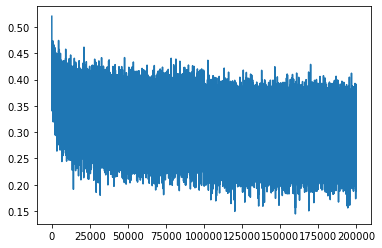

In [41]:
plt.plot(stepi, lossi)

In [44]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(32):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d=dimensionality of embeddings)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

cariah.
amellari.
kimir.
ievtch.
alessa.
jazoue.
admery.
ailaelie.
ellara.
coriiv.
asie.
yah.
amo.
ori.
essan.
aroi.
eal.
adbi.
orathu.
iearyiia.
kauiliy.
ailey.
ealiah.
iley.
yari.
alhaseouariusya.
ima.
oaozely.
oakmia.
amerenne.
asadl.
uoy.


In [45]:
emb = C[Xtr] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.7325, grad_fn=<NllLossBackward0>)

In [46]:
emb = C[Xdev] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.7681, grad_fn=<NllLossBackward0>)

In [50]:
# Exercise #3 trying the fan in method for initializing the weights
import torch
import torch.nn.init as init

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,10), generator=g)

# Use Xavier initialization for W1 and W2
W1 = torch.empty((30, 200))
init.xavier_uniform_(W1)
b1 = torch.randn(200, generator=g)

W2 = torch.empty((200, 27))
init.xavier_uniform_(W2)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [51]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [52]:
for p in parameters:
    p.requires_grad = True

In [53]:
lre = torch.linspace(-3, 0, 10000) # learning rate exponent
lrs = 10**lre

In [54]:
lri = []
lossi = []
stepi = []

In [55]:
for i in range(200000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (64,))
    
    # forward pass
    emb = C[Xtr[ix]] # (num_of_examples, 3, 2) -> (32, 3, 2) b/c of minibatching
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
   
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

1.9027903079986572


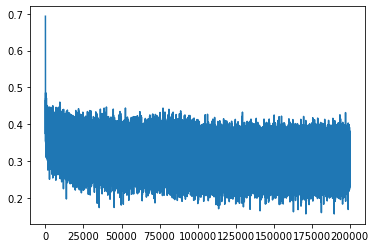

In [56]:
plt.plot(stepi, lossi)

In [57]:
emb = C[Xtr] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0263, grad_fn=<NllLossBackward0>)

In [58]:
emb = C[Xdev] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.0974, grad_fn=<NllLossBackward0>)

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(32000):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d=dimensionality of embeddings)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

In [60]:
g = torch.Generator().manual_seed(2147483647 + 10)

with open('gen-names.txt', 'w') as f:
    for _ in range(32000):

        out = []
        context = [0] * block_size # initialize with all ...
        while True:
            emb = C[torch.tensor([context])] # (1,block_size,d=dimensionality of embeddings)
            h = torch.tanh(emb.view(1, -1) @ W1 + b1)
            logits = h @ W2 + b2
            probs = F.softmax(logits, dim=1)
            ix = torch.multinomial(probs, num_samples=1, generator=g).item()
            context = context[1:] + [ix]
            out.append(ix)
            if ix == 0:
                break

        generated_name = ''.join(itos[i] for i in out)
        f.write(generated_name + '\n')
        print(generated_name)

carmahzato.
harlikimree.
thiyah.
cassie.
rahni.
farliah.
jareei.
nellara.
chrii.
desleigh.
ham.
pora.
quintis.
lilea.
jadiq.
wayell.
dearyn.
kai.
eveirulion.
deco.
abette.
hastravaras.
bray.
ksyn.
peq.
osizely.
ojani.
caseren.
kensa.
luco.
zoe.
silora.
huxnie.
molly.
nox.
henelleonna.
brig.
aya.
kenziah.
brion.
der.
rasis.
quincco.
zakinleyda.
bryn.
suan.
koamdeeve.
kyaa.
cato.
row.
jaycelourking.
jozellezes.
augelani.
kaeresli.
kymby.
baryiel.
cha.
nazyiah.
khalissandruad.
trik.
olani.
rocki.
alynn.
kalayz.
ime.
srin.
kel.
catiya.
darlet.
jouri.
avri.
kayah.
dakarkeeimit.
samargarim.
gal.
thela.
ella.
reix.
corehermayuma.
amaa.
sammajood.
joak.
harsha.
colima.
nazelynne.
brel.
gine.
talee.
kiel.
zaviukj.
keileiya.
kenslee.
dreyan.
daxleena.
millah.
tra.
everiah.
zenius.
jeanstaliyan.
abrith.
daveen.
asin.
emmadieus.
bin.
yahna.
taydeem.
zosime.
shah.
yia.
kayn.
shab.
zic.
taffranthlynnamia.
mayariyannoa.
avani.
ypraiya.
harsten.
abigas.
kayleea.
sevi.
berlettrevia.
wwynn.
geon.
jhor.


julie.
randerri.
meri.
huhalani.
jahzie.
nas.
taigrag.
isanna.
meclary.
rocklynn.
sabidy.
roma.
ezerie.
tyrennah.
hene.
khalex.
brejano.
aleigh.
jaxxton.
den.
amaria.
amyria.
anya.
kamrist.
riolie.
leont.
liaiya.
makobin.
cayonnah.
ser.
laiyon.
kharim.
ryli.
lyn.
jaylyn.
bena.
pristee.
ahrista.
raavit.
dardon.
kayzie.
sten.
kaysleiir.
chaira.
evan.
osiah.
corthira.
alynn.
megasmaell.
elianoor.
keily.
rena.
ikia.
darmon.
sam.
lorennys.
stasiel.
shanie.
fran.
kymair.
shra.
rhiy.
desleen.
malorya.
akeyton.
on.
calla.
ker.
arkier.
shriann.
zavien.
bassa.
eas.
ashryston.
alaizari.
brie.
lakiramillysa.
nav.
bracee.
paxtyn.
vid.
izyn.
mari.
harra.
ri.
aaizabetto.
irett.
diah.
nelle.
zadela.
brae.
hasely.
ster.
roselor.
con.
zyriel.
leigh.
angelison.
jamerli.
liss.
wyler.
atma.
anna.
vid.
kreylia.
lani.
zis.
meenn.
fernee.
monleyariver.
zamira.
equey.
hawcaron.
eier.
mubasireenday.
arius.
evole.
adra.
rostel.
laver.
mow.
sko.
jere.
archenaise.
ritte.
jacion.
sha.
aubrishleigh.
hael.
marius.
br

kran.
laksharlyss.
marlit.
taigeilah.
shira.
avestrayleah.
yaklenndo.
skyel.
sterry.
kius.
beeison.
alaizlyn.
blemyaan.
zaine.
kysen.
lon.
tiana.
meley.
ana.
avievell.
ziya.
juna.
keny.
everic.
aleigh.
haskyleechi.
peara.
prys.
azuta.
oren.
langrestian.
elaykentuon.
anna.
lori.
lee.
warco.
braxsimarna.
juliotmimitson.
aimebu.
jasaci.
raijamia.
dorby.
eliasira.
marioliamaila.
elden.
branderina.
ranyieresson.
arma.
sharlyn.
abukh.
ida.
sary.
naleigh.
ott.
laffynor.
trugon.
jermu.
jazon.
abdoullakennyxa.
antens.
haridityrainson.
alizie.
kemilaizenioluwa.
sharge.
ayilianashtyonniyal.
laniel.
celyn.
sofyden.
jaryanna.
harlen.
kyiah.
alani.
kai.
kase.
alano.
kis.
kaisley.
alianikven.
shandric.
ola.
min.
ahnavion.
eiloni.
prank.
radyn.
ryaxlori.
wisa.
jere.
bron.
rhithustiniko.
righ.
alea.
clyn.
bartheoxton.
storo.
vayahueb.
xandreeklin.
nyann.
alan.
astie.
yia.
lanti.
garlith.
vian.
alaniymonty.
aedyn.
kai.
eliellen.
jakh.
mari.
saji.
iri.
giulistorie.
adoue.
tamelairyana.
zoa.
cydena.
escel

deron.
vianabel.
kinleago.
olal.
katell.
eline.
aamiliah.
takhius.
mio.
than.
dareen.
brince.
knan.
caidana.
omeia.
meron.
kaekenna.
remy.
melie.
akiraanayerlan.
malaykena.
greese.
iam.
kalieson.
zihanna.
samus.
mckil.
sen.
lyefran.
ozolissanata.
arline.
youdhays.
ton.
elbeklara.
demajeyda.
delin.
redrion.
marilqion.
joella.
she.
hain.
corbih.
jivynn.
amogie.
robi.
baira.
katryn.
mira.
shil.
sion.
wea.
hayfaan.
madeerinley.
rina.
laryanna.
laz.
ryelestina.
dagnn.
naori.
malaito.
laton.
cayley.
arhybell.
bari.
vion.
mych.
caliaprin.
artha.
coltwortlyn.
cir.
axza.
jaykense.
arran.
kadalyn.
stev.
wess.
sophianon.
shira.
ram.
asa.
leighle.
mahiah.
kylanalla.
ady.
xilyne.
paumonelis.
jackkaylina.
leamuntaelin.
tellani.
mir.
juri.
jairick.
jere.
camismarya.
daina.
rose.
jetsabelli.
karianel.
guvdi.
kellamar.
kalanick.
jana.
coluwatyssa.
saely.
ven.
prian.
omentzer.
baila.
zyike.
averyn.
crusei.
khailena.
tai.
itichaiby.
xuran.
yit.
den.
eriella.
shel.
leigh.
maqchella.
devillie.
brigh.
rita.

victorantina.
syr.
zer.
mice.
macher.
amarzolah.
rhoose.
janey.
amni.
hose.
chaysabdy.
ara.
charimorgarry.
tianna.
jeh.
blakelokeryn.
kai.
kristi.
rebelvi.
suna.
ella.
tiylasiya.
abdie.
jim.
rhitna.
lin.
row.
anja.
reigh.
khelia.
moldaniyah.
jerentley.
trae.
weslinkladion.
hameiko.
sogan.
royalexlie.
elyn.
weltyanna.
emelyn.
britt.
mouthianie.
christon.
zaaha.
ehra.
izzaya.
kaeon.
kaya.
tal.
charie.
cata.
dinson.
kather.
camilio.
yvissa.
yan.
emosa.
avaid.
samarist.
mari.
adalisedric.
aida.
brey.
kenzie.
jenston.
niv.
akelszi.
ana.
vianna.
eligny.
brynley.
bryn.
kruhansh.
zundarishan.
averic.
nazie.
sar.
trela.
rafiann.
porint.
holann.
kazion.
saba.
mad.
daw.
helani.
druksan.
harleya.
rya.
shridden.
caprina.
colli.
zaylee.
wredley.
calli.
chaywan.
condyston.
calynn.
ram.
kilee.
lennegan.
julyk.
omreon.
nathufver.
kani.
zhane.
maderic.
brax.
nyvan.
zeppebellynzo.
kylah.
niharlani.
quma.
inzy.
tyleeya.
obe.
arishaygaeling.
janimihlane.
brah.
te.
rock.
kyssa.
laiyah.
lyn.
vivan.
saamion.


ibraelynn.
najoma.
mikaylanier.
hamsion.
adallee.
haden.
brena.
jeriyanklynn.
saheemio.
lan.
diah.
khendon.
paysin.
kelorenderinton.
karius.
rem.
miya.
princey.
hon.
alenay.
kella.
gebern.
liam.
naiyahmarell.
audrinlee.
jakinderjelma.
ahirat.
tzi.
ailyn.
cata.
sah.
iree.
brayleen.
sabria.
rah.
koldley.
zeriteina.
pain.
artin.
now.
bar.
isabella.
teagarkie.
jashebellia.
marrisinnly.
kaina.
ijahi.
rowavia.
lauria.
jaelin.
mala.
beckelaigh.
athrubes.
heida.
asia.
akserail.
erabysa.
merickston.
kaj.
ray.
ircaiden.
zen.
noad.
kalaysis.
eslor.
ozel.
garylah.
rena.
kenz.
zayler.
ladi.
shawn.
oas.
cree.
hiya.
bresh.
divadon.
keyaras.
emlyan.
celin.
anayden.
harachaidi.
naphill.
muz.
ender.
finnley.
mckente.
katemiah.
even.
graeler.
keri.
zollina.
angelbell.
eila.
socan.
kol.
alynn.
priztalee.
vion.
iji.
nire.
ron.
jay.
keith.
isa.
xni.
lina.
yan.
shreider.
brovey.
khirwaora.
deviana.
cadhi.
cori.
roklid.
ish.
jaryah.
zan.
dan.
leigh.
emelailee.
zariana.
nyyah.
lin.
ana.
kahrad.
khai.
carlet.
a

dos.
haila.
jerek.
raylka.
marjanoz.
priel.
lynn.
that.
tymeph.
darrowyne.
tino.
stacethrosa.
dolino.
semandre.
deb.
maziyean.
ryegan.
cholden.
tobi.
nee.
jae.
dan.
giulani.
enzier.
zal.
camari.
ridharincarsha.
samius.
tarius.
stefatobin.
kimberlin.
myen.
ramiaraeso.
rylonichem.
rosla.
ably.
mia.
taghanuel.
jian.
adalynn.
kember.
jarniel.
kash.
aquaton.
harten.
fqeya.
cecisellee.
maren.
greth.
riston.
amya.
seh.
kashrat.
nae.
calatuwa.
kaire.
lood.
ler.
broy.
toriyah.
lilye.
leza.
carlan.
camilaim.
key.
morianarthorrij.
cayla.
lanne.
herse.
swa.
rmondre.
duriyah.
barasha.
sera.
delas.
emilynne.
jere.
nay.
allan.
alin.
zachassia.
bradyan.
mckcrosea.
zamylynn.
syrion.
maheal.
zad.
akhmiel.
avia.
lea.
kace.
layvee.
hayden.
crim.
jianah.
macyy.
eimorgelin.
tasav.
abrodesten.
rigo.
jenelyn.
ryl.
keny.
coressabel.
cariann.
sidita.
alsub.
gion.
benaylyn.
less.
cley.
eddnlyn.
ana.
kaleah.
mella.
isvanco.
mournicx.
nivana.
nei.
avi.
gwaylen.
kenna.
dian.
bokimittae.
ivai.
karlin.
phi.
maksh.
jo

nia.
davabil.
kolbysheem.
joel.
riyah.
amen.
phie.
sameiristyn.
laud.
meia.
temlie.
jaiden.
niheem.
cale.
derron.
callin.
chekolynel.
bea.
elley.
sullianpoliva.
khyliani.
isahil.
miliam.
avah.
zai.
carlinadhan.
jhanel.
isa.
damia.
aislee.
tae.
zamed.
eved.
kaem.
eliz.
elinnextrev.
albe.
saiaron.
bro.
juliani.
daija.
tristin.
yaa.
faiza.
brayshartvontavia.
jaemia.
sasiavaha.
elin.
dan.
fahi.
alane.
caslyn.
jerey.
demontrachi.
khyr.
que.
jeon.
nyk.
yumikadalayah.
clor.
esmarihantin.
miana.
adriah.
larem.
mayianna.
yasiden.
talan.
gaurah.
arion.
mykiel.
padi.
jhira.
carri.
romenio.
torian.
nalia.
zarier.
chaanius.
him.
cylie.
elynn.
azie.
ten.
jadila.
kaellah.
frisom.
chrislee.
chitha.
daygnan.
anne.
bok.
shreelan.
jaykela.
peylenda.
chas.
yana.
kayliegh.
a.
eva.
enisheyde.
aubris.
aubrarentlea.
jebusta.
lieo.
zyahnaviousa.
ston.
jachi.
mestenisa.
edrian.
hussa.
cylyn.
niana.
yana.
nehoni.
sergenoctavia.
sen.
yach.
ar.
laudry.
yous.
ashvika.
vin.
khir.
micheda.
ker.
brymberla.
joasahry.
c

nikola.
bodow.
mucio.
azon.
arzuian.
elikerah.
rylie.
briel.
loluwe.
kan.
vron.
frandrey.
zicalla.
jahmiel.
eston.
kroskour.
fhnesliea.
loria.
inne.
shawn.
darianna.
vion.
chaibelamil.
adelissa.
laxxon.
hatta.
montayviano.
lin.
kamarson.
omis.
hazemiah.
allow.
wade.
kendley.
rain.
prichi.
mella.
jaxwa.
caelynn.
aaliah.
ade.
ana.
kenz.
felyzendry.
sukashadlinton.
yomarci.
sharendre.
khorlanyn.
breav.
mehran.
abellah.
saan.
tari.
raahim.
hadilynn.
emaibana.
loria.
romein.
muly.
sophaeved.
bryn.
aaly.
allestaggervinna.
rovelley.
zoah.
brian.
amarci.
nazayann.
albe.
jird.
rhy.
auren.
tayden.
zachekwan.
knigarrick.
remberto.
micello.
chashel.
rylynn.
brik.
sanioluwan.
stiya.
kashven.
kristin.
silee.
zamonna.
hayson.
leon.
demina.
ekarinna.
omeight.
laiya.
lee.
stena.
aan.
syrista.
syleen.
delynnyalaylin.
amylani.
jarati.
makardyn.
blaincie.
hapsia.
lariana.
messa.
eron.
reesey.
zoatobiyon.
vered.
janne.
harzi.
jose.
maland.
taylando.
daecelynn.
emellios.
marii.
ishadelina.
hehem.
kailangelu

shyna.
iah.
whitna.
dago.
saddi.
aarelle.
siya.
alie.
iza.
saryan.
murystora.
kah.
devarisier.
sailynn.
denna.
seba.
amorgie.
chasea.
anna.
creen.
elce.
alerie.
sha.
zuntae.
jaryanshaksashal.
paine.
rydnelaybrinalil.
elce.
ori.
faryn.
cheyla.
leon.
oluwat.
avee.
abith.
reina.
miri.
camyley.
nar.
rigeodorigoen.
kymanusi.
apon.
maise.
sevin.
lilly.
jermine.
brah.
crisabiyarace.
ama.
briah.
michelin.
wrynne.
ayah.
sha.
sodlynn.
cond.
gwais.
kris.
ana.
juwry.
kashell.
brali.
ory.
kayson.
olivianel.
dah.
abrishon.
xely.
aba.
jadyn.
sanalis.
aliz.
mir.
marimilson.
augus.
elle.
cash.
kaila.
grabhde.
carmon.
hel.
eva.
hanna.
hese.
kayner.
jaxzoni.
emma.
tasyn.
chid.
strel.
avidan.
novellandon.
dase.
axina.
lena.
vyn.
mahmiyah.
jere.
aarinchodi.
farter.
shreen.
raigemir.
orianardbierzad.
lizlei.
renan.
adai.
zaliaroniam.
heira.
jocio.
abdryn.
nistalianna.
parukoa.
zanaraquan.
chaelyn.
chrus.
ana.
aleranvi.
yer.
hukkingyten.
lydillis.
janahensleh.
camryann.
dace.
arlus.
jaylin.
zadia.
rikynn.
je

yaren.
aulrah.
zadeer.
halma.
sha.
trusha.
oliya.
atnaees.
yephor.
tremsami.
xine.
ithi.
lyan.
skallella.
pora.
sojuwi.
maria.
brah.
talbianna.
min.
jamila.
mckinzleyann.
miyah.
thia.
aleigh.
brek.
lordy.
viir.
jaylee.
deanna.
demutton.
casavyancie.
legan.
shia.
benjiel.
briah.
eline.
zavion.
greigh.
kemsa.
law.
keita.
treonnata.
fawuamilia.
greci.
ram.
millus.
mel.
niel.
tay.
joon.
gurnahshawn.
hazira.
yiya.
akari.
mehy.
zohamya.
sut.
zuvin.
parrica.
jay.
raidy.
lanis.
zanie.
havia.
elintroselin.
arson.
caina.
caliya.
emini.
saq.
ahaileilyanah.
kayla.
aisleelaniyah.
jamariecholly.
raelyn.
gothi.
haviasaveer.
nevaniya.
jaelyn.
bayla.
jhon.
tyriel.
alan.
kuzee.
tymeid.
timondy.
saydelle.
naodhid.
cham.
kamen.
khowton.
charius.
kolei.
aeson.
wylvery.
lai.
guneslyn.
azelly.
fhir.
brashiraj.
macelea.
masi.
ayvon.
maddaleah.
zariyah.
ell.
cony.
sunce.
score.
mae.
caria.
ala.
tamrenta.
alica.
hab.
bowa.
krisa.
jeru.
leah.
hai.
eston.
rainishaileean.
ara.
pasialle.
azeaa.
ana.
michevinn.
brax

sayvin.
guadalylaniya.
dia.
sre.
ederyi.
laronayarani.
gracleya.
freislyn.
kharto.
ofion.
jeweon.
xabelle.
nuarnon.
lamorrick.
maimin.
yoh.
zaiah.
dani.
reciana.
cornela.
yese.
leous.
avar.
kwyy.
haan.
finna.
mille.
amiah.
pari.
grainyoon.
pin.
helsa.
murricklinna.
kahlian.
micho.
elana.
may.
delijaha.
rius.
emlakell.
ronide.
grey.
sterraggebryan.
keer.
shimikeep.
rowynn.
mahasia.
jariah.
mir.
kaz.
santav.
ren.
weseannalah.
dexranmere.
janiamil.
imin.
abris.
kael.
shermine.
jenni.
kham.
kenianna.
karis.
heston.
nivian.
keanna.
gwen.
zel.
rian.
adeb.
estan.
jerilynn.
aeth.
ham.
taesiren.
harverlin.
brood.
briennonity.
bryliah.
troius.
artheida.
trady.
shylah.
randrina.
boueg.
sim.
kevea.
alei.
aziq.
marius.
quin.
jo.
keymendyn.
hain.
try.
edan.
sen.
zoa.
menoria.
ryanan.
ephet.
norantoomise.
aireesophilla.
henceretz.
kaire.
wradhollvinae.
xajcha.
aristou.
tanalyatt.
nika.
del.
evannikleea.
madya.
pen.
jezekinzy.
akhi.
roselly.
kenleygen.
xavie.
bar.
elyse.
joenylynn.
kaixa.
ciyah.
lika.

khyla.
shemilyn.
angeroni.
timar.
eston.
ey.
mere.
ashalica.
liniq.
wyabunte.
lir.
zayvin.
corie.
eliean.
kynn.
saraigan.
timeeka.
marsxim.
breese.
min.
kaisley.
payric.
uran.
canysleigh.
nitien.
lovarjaiyanni.
rit.
brexsa.
khaedanelleahmira.
mika.
adrine.
vin.
laxod.
ram.
kyla.
barchene.
kamaria.
prest.
brystina.
adontelia.
jer.
aliba.
brie.
yasurah.
azan.
abenjanaya.
ela.
pres.
kimcion.
arroncopeneli.
briart.
fartin.
rome.
khaleya.
alimer.
zis.
anga.
lougeneton.
koran.
lejekzy.
sara.
zen.
welin.
aliya.
akiara.
kairacynnesyn.
sha.
ell.
fenis.
jessard.
alani.
thrisha.
haem.
syrvi.
amillillirgenett.
aarvin.
rion.
charianna.
jurs.
crael.
nor.
oriyah.
lan.
jouri.
zameria.
dyl.
caylo.
zir.
jakh.
polly.
nekai.
adley.
kynz.
joma.
kashawn.
samik.
mayson.
keinah.
wie.
rhystin.
vaieeto.
reva.
she.
sammitolie.
anna.
kimbelan.
saireelin.
zakot.
iri.
shyellamilliee.
oakley.
delyn.
haji.
aley.
angelyni.
iliah.
zara.
alore.
nyal.
aigh.
aan.
ariyah.
ana.
anmyziel.
keshil.
maelinen.
grett.
may.
alicar

nyx.
zaceka.
jorner.
jako.
mira.
amyn.
namoria.
oda.
kyre.
moralyngslee.
tylenellimi.
gregonden.
logdeseagailynn.
jay.
solesa.
sina.
pari.
brax.
calla.
morgeithan.
davin.
kael.
galocendrayanna.
mia.
idaniya.
demani.
zarien.
najaud.
brayline.
meir.
zarien.
sanni.
jumi.
moni.
omereles.
maissaheem.
darnickemilko.
ala.
adari.
krys.
dreonoluwadon.
raq.
urpon.
jaryah.
geoluwa.
devina.
alden.
yush.
marla.
azel.
eiv.
oluwatini.
kamden.
ree.
merinadilina.
kamia.
shree.
feleeden.
lee.
afden.
quan.
navi.
hia.
zari.
adila.
briina.
dia.
zime.
barmonson.
zaylyn.
natana.
holayak.
everson.
revek.
xavictoria.
arrin.
ocia.
dohan.
elle.
peigh.
trynn.
rori.
zarahpa.
riah.
omelee.
racobi.
macy.
elo.
nylani.
adancie.
mahab.
jobneoluwa.
lazar.
heem.
kany.
renziel.
driger.
emerchishermanyaahsen.
art.
korgin.
jenner.
mab.
mariz.
wyck.
khylunie.
siai.
anusi.
nire.
ragelsief.
gleder.
korionta.
gargiovion.
qua.
keon.
astren.
marett.
nick.
jayiah.
maniluntana.
micarley.
ridor.
and.
dane.
jall.
can.
hasmin.
hinslie

brue.
blas.
dey.
mane.
zerin.
jhat.
cia.
brhan.
miah.
trin.
laora.
kalah.
stel.
abdilia.
mel.
thaniyeanah.
jhi.
landiel.
spra.
athie.
swa.
zaena.
zyon.
lamizenna.
martavinillinan.
ellaysauly.
anna.
nay.
chrince.
timoni.
brayvaniyah.
dmiran.
carrah.
jah.
dona.
can.
kochliaz.
sarira.
jayvon.
naecelyj.
sulten.
elis.
candalika.
frana.
zaryan.
azha.
nia.
qissaram.
juj.
kacynley.
viviarowo.
kamberen.
lobrayella.
ramiah.
kenzi.
atayvon.
tor.
janyime.
mira.
zeki.
tae.
mace.
lynn.
chaydney.
kata.
swhith.
zunick.
morayman.
briel.
bruk.
cwaylian.
lory.
tymaa.
ryela.
lonaina.
kavianni.
laydialaiel.
tah.
ruquadcias.
nimous.
zeri.
cessa.
christynlei.
sariel.
azieres.
camariel.
mir.
marimy.
ricelyn.
journu.
maxi.
ree.
dilanovan.
shina.
sterick.
esza.
islee.
azzin.
town.
mayese.
fayahrana.
mario.
jamari.
kort.
srey.
jakyliann.
dadeo.
araq.
shaqora.
sachi.
brenni.
kariel.
dante.
greigh.
mayraheen.
keelee.
kenda.
yaf.
xyon.
nabeel.
emonte.
cotta.
hirandwadelani.
iliah.
macey.
ros.
marybel.
jamiya.
ksaye

leshan.
man.
furon.
kingel.
jalyn.
harli.
phasia.
emilah.
trishae.
keison.
stias.
mikamil.
sia.
beckerpeo.
azari.
ron.
chrissand.
rafika.
ani.
sofi.
berlylaniel.
madiamososhine.
maraelys.
dalyn.
amryn.
miha.
fertlyn.
jackiyah.
suryphukiko.
harmela.
jonna.
jire.
zia.
iry.
mynn.
kobin.
eshel.
luc.
lel.
kaid.
mae.
latie.
zira.
vin.
maxie.
tro.
jayre.
hae.
emilli.
les.
clon.
izen.
pon.
traysophida.
elina.
kerriey.
cari.
luanie.
brayde.
tignani.
emis.
miguella.
eyson.
jor.
westina.
kaniah.
tayanah.
bertlariya.
raquincy.
tophinsleen.
ahil.
keymarka.
katee.
harri.
rad.
hardo.
journiee.
sukaillon.
caydynfoth.
eden.
ady.
elianallya.
maria.
myler.
colivi.
kane.
zavi.
carto.
clet.
najayinesso.
kka.
mace.
jaida.
shinlean.
merie.
zalenet.
mehrin.
ney.
demalrosef.
eeshawnlee.
teair.
daver.
armelasetta.
dakiel.
maysia.
dmajanee.
yanna.
jane.
raf.
zer.
meen.
noami.
jozeleslee.
elie.
azz.
mael.
mahelaniya.
licereslyn.
kherickayveri.
lyn.
riyan.
raiyah.
tore.
adlix.
atte.
nis.
kalisse.
rhycelija.
zan.
b

cojaelairona.
dey.
sharlynn.
mimdrael.
yan.
jaidy.
tes.
kiel.
des.
chrisaber.
mad.
innon.
xariel.
lem.
chiliah.
natana.
braxden.
torie.
odyimany.
jhorah.
braceyelenamibuaine.
manuella.
quinnah.
doriza.
shalonida.
lon.
vika.
kimberlin.
caiden.
teerjah.
bria.
kenedynishik.
jirmela.
caelenn.
sanielan.
lyn.
trim.
con.
ten.
laine.
zie.
harleesen.
casabellys.
elis.
adro.
neesir.
jazynn.
mir.
enet.
alous.
emarianna.
dany.
xalda.
karie.
karem.
raiyah.
ebellai.
riga.
lilen.
elian.
victom.
cabrankinn.
nika.
evelio.
teno.
caftyn.
dabria.
muzo.
revalani.
mafinslanie.
brena.
kadiellianory.
cin.
yarosalee.
sajay.
slonna.
osmikolason.
haimana.
hancelius.
siresha.
races.
suneli.
klabyston.
mamanyiston.
emmalailee.
tialanie.
spira.
mallia.
kamyrosana.
zavee.
penly.
hatel.
lyushikadinlei.
tor.
jourto.
arjacari.
felidule.
euv.
delylle.
georgenormarie.
cori.
suza.
naedingstorriko.
nahlon.
den.
manthowteniyan.
ingn.
jessephongayma.
nyianand.
bren.
eve.
novand.
trus.
elwo.
maria.
sand.
milamariya.
mycen.
ja

rynn.
didon.
taleansh.
lora.
amariell.
zyiah.
fion.
kailinka.
zakh.
timan.
eib.
rix.
akena.
rusty.
zakadriceon.
ansy.
meira.
coemer.
cee.
loriarona.
hawn.
tiya.
kaym.
copen.
arma.
char.
azandrian.
tigna.
amarikenno.
corbiya.
caleighan.
kaedh.
nora.
jaylie.
yaden.
mari.
ramila.
alvynn.
shviana.
alayah.
aviani.
gremarra.
azh.
kyma.
laynixelyn.
coly.
jce.
kenneranty.
kai.
kowi.
aurella.
del.
jenniella.
seklaiah.
jakshawniotte.
brian.
ster.
dura.
iver.
koheniolee.
zava.
hyuniel.
esselli.
rosiala.
hael.
miki.
kil.
osmia.
jayse.
calsy.
anna.
fen.
julco.
ren.
nova.
jozdankynzlyn.
abdulyse.
nazdin.
jesilacari.
jurie.
thy.
peppinon.
bryse.
obelianaldo.
aarev.
abis.
mize.
saun.
toran.
mayah.
adanbertana.
evgreya.
dryann.
johnnie.
aari.
brajoor.
evy.
lenet.
conta.
via.
zeld.
knoluwaphina.
tawine.
chrie.
jameliana.
khius.
kalaya.
fenidenco.
tylee.
rayine.
jiod.
clovey.
sha.
fiennedslyn.
ant.
cyriquen.
dara.
abowyuko.
edmaddeline.
chanvine.
zavaya.
jamir.
mcy.
tyn.
anna.
aaragope.
jeelaystavia.
ann

phillissatine.
arha.
elle.
jerrelidi.
zahina.
shya.
jerene.
rowyncesia.
shyn.
hedela.
alore.
male.
aalairlatrigurnoleth.
haye.
enithriya.
dion.
jahloy.
muhae.
colle.
zoua.
harnaniah.
bryn.
hadiya.
zebetta.
auga.
arsyce.
kacimmadianna.
welyn.
kofion.
gal.
zela.
aldeniyana.
marylyn.
jeh.
milley.
hom.
jamann.
ken.
rashabellian.
samaziquaj.
den.
raja.
tos.
cheldoraely.
brya.
nase.
brafinnton.
hendreyon.
rav.
anhelen.
wyliani.
grace.
ana.
loket.
freidancaul.
grachaikamre.
gian.
keyna.
candriarayden.
mikerie.
cathiam.
kalila.
rad.
cammith.
anza.
chora.
lyn.
ayrkamphemarie.
nikeem.
ivon.
zaela.
mira.
adoulyse.
lah.
khaika.
iven.
endi.
sahi.
baxtyn.
willa.
pran.
brah.
vera.
dwy.
wuknur.
skyena.
alexi.
nakory.
rashbethrudevely.
audreggler.
tai.
konsa.
coperson.
krishtyn.
niresona.
jazeno.
emon.
zael.
shi.
niscelyn.
sophpred.
whystia.
royalianna.
dan.
aman.
grey.
suhaydence.
chaddig.
rosalah.
ivon.
delise.
avna.
rori.
cylaniqueilea.
ban.
beck.
maira.
bon.
elianarderraanya.
alikalan.
maansh.
safa

adoorel.
darisa.
cambria.
viv.
zyoindi.
moryan.
rae.
yavani.
masee.
nah.
sajidera.
deli.
ramilee.
avvann.
brah.
torenton.
julie.
amer.
tyn.
mira.
dari.
rippenleen.
emmerartino.
alie.
aleen.
dane.
shavaerin.
mir.
giavaryn.
kindalaikeem.
xylaristen.
pier.
zara.
liya.
kaison.
khaspeneon.
zher.
cannah.
yan.
dylieic.
carlyn.
atta.
shi.
finleyebrie.
areeb.
emmaling.
athik.
kynli.
makyianai.
brid.
jafzyn.
mela.
chis.
dako.
emer.
jurson.
tyrisaarib.
jobence.
illio.
ezradelynn.
karma.
cha.
mund.
krishawn.
wen.
dymiri.
chin.
ellimari.
ryloneyla.
bayli.
kon.
kembrigi.
cannalah.
brenn.
ara.
kaven.
den.
traifani.
alden.
avi.
adalyliobby.
aurdo.
adroxiaa.
jizabethalko.
chia.
eth.
kaito.
tyriel.
shita.
khyla.
jenny.
jhoriellaziya.
malynna.
jaxxnennon.
elan.
alaiah.
adric.
eosh.
brez.
porumykinly.
makerlee.
ced.
ave.
inacya.
melilah.
romili.
hayse.
alie.
jah.
dwura.
zen.
zh.
hahmaela.
meiko.
nys.
fin.
kemira.
zadian.
angta.
maleslani.
jubb.
muel.
ddhavia.
nyrinsleen.
payli.
zyanalie.
younhan.
eke.
pay

trichel.
sergargabrin.
maleka.
zuartion.
jola.
kamanikipa.
kamarven.
irasen.
camyrikol.
aley.
des.
jahaneyeen.
mcco.
hir.
den.
adielle.
shaddlix.
breazleigh.
bram.
kelyaa.
saler.
aret.
ter.
jakory.
aude.
lena.
jaredwaleah.
bree.
atheprie.
zia.
avia.
bruk.
nice.
audriggardin.
hawn.
thlyn.
elishaji.
baylyn.
jemery.
ori.
limzainsu.
jamya.
ciam.
elkalestyn.
rie.
klee.
joow.
layya.
mya.
kayne.
taye.
ziyah.
johanri.
tyn.
zaxlynn.
anarvi.
jaysielynn.
pene.
zessy.
kirzayn.
daxley.
catalynn.
jha.
boes.
kella.
afsirick.
kayliai.
tayse.
jenni.
skylai.
traldo.
hen.
beck.
daljaasual.
ori.
aariano.
wess.
len.
chan.
marah.
orlanii.
jean.
zazon.
kellie.
aversyn.
avia.
hasia.
sickstafmyra.
marredgexrin.
nigan.
satha.
samileem.
stinoraliden.
eles.
ezeen.
headanna.
ton.
george.
aubrey.
sagwy.
ter.
ezy.
maga.
san.
marmonte.
anny.
zik.
jehanai.
kalah.
lucysabell.
jani.
arta.
ryerianie.
dickelania.
corniella.
ayouh.
nytis.
saj.
hakenna.
colspira.
takizecharithie.
joellala.
zek.
ocra.
rylyn.
armeryann.
bryn.

lorani.
amargeah.
hadi.
kaleigh.
eria.
brah.
sheem.
laen.
gracele.
yashyla.
zory.
jaqu.
avie.
gracey.
kysiah.
sai.
isley.
kaiaranzie.
zylyn.
britza.
wade.
anna.
sunmazon.
kaedelys.
ziah.
cean.
jyonne.
rylah.
emmanuri.
chelina.
lania.
kriston.
auni.
huxces.
jaz.
quila.
elveremermanya.
aylandre.
stan.
mika.
kamalissa.
era.
ston.
roah.
mauri.
dra.
xayvon.
ward.
leana.
niko.
chariya.
tyrl.
jarina.
row.
hendy.
carlonicolvina.
gwentrey.
zah.
jilya.
marco.
tymony.
zay.
rizah.
keylin.
ebelle.
jeristor.
ahkedriani.
dey.
emetriquetarlee.
kadrielle.
revy.
temi.
jena.
ell.
axell.
wrio.
maizley.
acalandreida.
ruhotny.
millan.
ron.
pay.
cheliz.
lizeah.
rhia.
westina.
zi.
aya.
shravarelle.
loue.
breem.
joaklina.
josephrum.
anha.
kena.
tan.
beck.
koata.
afris.
hadine.
surex.
alizgal.
lendah.
jeanaahmeek.
hessa.
bisy.
hana.
sherik.
ana.
pherlee.
mingurto.
dary.
millya.
sum.
jaygeron.
tyjah.
aylynn.
zaciiah.
keish.
zacley.
ska.
shua.
loclyrion.
ydison.
hazlania.
paprim.
conna.
adalaezonaveence.
elina.
n

hel.
kath.
gun.
lon.
burlee.
terra.
savioushawn.
adin.
augen.
tman.
elynn.
sorion.
ameronny.
arainatomi.
finlee.
dhanalee.
dani.
joha.
colivieldin.
ani.
miloni.
dasian.
raildance.
azari.
par.
auba.
reen.
lyse.
cormanaihaanflynn.
allianna.
nie.
ocroyalie.
etta.
mira.
zakyla.
aubriah.
tevontavan.
ala.
dan.
isa.
azel.
maryana.
caemarvonni.
aaya.
osi.
khristephanb.
azul.
corelyn.
gari.
kin.
tis.
onuriel.
yous.
dora.
rius.
ane.
gus.
haan.
niha.
ayra.
bar.
luillizardin.
zor.
calee.
ron.
luizabennee.
shita.
saya.
ivelyn.
leilen.
loryalianna.
jon.
alania.
keilah.
lis.
zand.
rod.
chukwu.
jah.
zayce.
zherie.
navi.
raygerestephilipend.
breckella.
lailee.
hollia.
siritt.
anaya.
luka.
everi.
maura.
ameigh.
sahi.
sha.
thya.
ira.
shena.
brezon.
zamersty.
adjayvier.
him.
skyley.
demerlynn.
annery.
chas.
zayliannchia.
jerristope.
corton.
iya.
evon.
delaimos.
tae.
gregianysha.
lari.
gizela.
yarell.
frego.
gia.
mugina.
hazel.
lacy.
brogeloji.
abreyana.
sumi.
tymarings.
chris.
torriah.
adond.
ren.
ella.
e

lani.
zakayvin.
bri.
misaylynn.
ael.
melan.
pris.
karia.
kharihanai.
zayda.
aleesin.
bert.
wildannykaledridhyan.
elingarlyton.
garydon.
tzoquydax.
tana.
pran.
ric.
rae.
xavayine.
khanya.
haziyon.
eppit.
arlieo.
hallenzlaria.
patrexletcheen.
miyrah.
haydi.
dilyn.
guriyaam.
ocer.
timitracs.
yelis.
zachisleem.
carlaris.
anilani.
chilynn.
nery.
sheodyn.
gustyn.
lymey.
nasminyren.
kelanias.
chiah.
abellan.
xis.
ray.
lucian.
bridray.
kace.
daeson.
laike.
aeriel.
nilana.
erith.
ahreh.
ghan.
tigrashickenai.
wei.
daley.
meia.
ozeda.
kauelyn.
dani.
jentley.
byree.
darto.
traxtion.
kata.
ercylenan.
dina.
kai.
maria.
dusta.
jaenique.
kentyn.
ahme.
braylen.
kaishono.
briann.
dairosedalinn.
alivince.
mayu.
fangeloria.
dalayanna.
jazel.
morie.
avie.
gianna.
brina.
zerna.
petu.
kel.
myllthielle.
jrose.
sheksell.
kaima.
mika.
aam.
briel.
qeeyah.
kin.
alymichoen.
kaheejashvika.
cyris.
bren.
ell.
xya.
jhiklee.
lodi.
anate.
juan.
tagan.
mykier.
peel.
brayina.
suka.
zuriel.
natik.
behraj.
healan.
stefana.


hephelin.
ailionnah.
avyana.
ombnionn.
ivrocklanna.
aren.
abide.
nastanto.
failion.
aiya.
zan.
rorioshailyn.
garance.
cereniya.
lothan.
saa.
cra.
seriana.
khim.
dorxo.
hous.
emrecledin.
tylijuar.
tan.
armen.
ter.
kobie.
elika.
rienner.
olinne.
arahira.
and.
ranylisod.
saahiro.
coy.
deet.
brey.
yammersa.
macanee.
daislie.
alan.
charra.
crord.
azio.
brickief.
mas.
shadley.
jayqua.
dmae.
zha.
spon.
fasia.
kamylah.
kmon.
arreenorie.
kaon.
saban.
jakylas.
mish.
aayi.
adamonethana.
kyled.
mykier.
jasett.
mais.
calynn.
railani.
aan.
caalitzel.
ina.
ari.
crey.
eramori.
gatt.
krishtavianayana.
binna.
briel.
khalynn.
nixa.
axelin.
khae.
hiya.
danika.
karel.
kayzel.
narie.
yous.
jamyrian.
ziah.
skylahny.
kerya.
ara.
eyna.
denique.
melhasquori.
taule.
olivandyra.
dillieger.
petris.
neva.
thy.
dan.
ska.
kimo.
taurie.
laziela.
.
mali.
hus.
allianaya.
lail.
jasmarishan.
kharnoory.
alianio.
man.
den.
ellanira.
sha.
rewt.
annslee.
carmeloreon.
novange.
inn.
callian.
keirush.
nivalonie.
aryalicionni.
sh

adii.
saa.
ima.
makayli.
anet.
merson.
thermay.
anth.
mollon.
slannen.
brooke.
tydena.
pen.
era.
chi.
drayia.
marelynn.
kaise.
rayah.
ari.
jofyairyn.
azaryana.
frey.
waz.
khiel.
tra.
abree.
oberlee.
lan.
danirvatifeon.
anza.
nallige.
an.
natiana.
sosie.
darys.
gene.
tyrese.
aida.
braylena.
seveas.
salis.
aadiya.
jayroshim.
locklara.
keila.
daisland.
diah.
yesh.
nika.
kata.
gas.
juazadelly.
sivere.
alie.
dise.
alyssa.
kenlaina.
cley.
jean.
zimaglea.
asaison.
lucellare.
amayshani.
pryftyn.
arelea.
zeniden.
tiaroukeynab.
zophirah.
jamoria.
kalen.
adhi.
jose.
victoriah.
jeme.
haydon.
delisian.
coralla.
graegelionora.
otheimoori.
tyre.
khius.
lace.
azal.
per.
jokeona.
dez.
erielore.
anel.
ner.
cherge.
tya.
adria.
jockledon.
wapthorneygen.
rille.
calan.
getise.
ayd.
peph.
aley.
anna.
briahlio.
jaheed.
shaw.
des.
tyn.
aztannatalid.
ambert.
aariula.
evelonten.
koelieghan.
brerik.
hameedla.
kin.
casten.
wodesynn.
jet.
nauron.
avleethanna.
corson.
kymphoadshi.
lis.
wilsando.
ohanna.
shawn.
abish

naosby.
marehya.
villi.
khylia.
lil.
taqua.
rideda.
jony.
shrenza.
telailly.
mereciana.
alanie.
prian.
tallissajire.
shamyiaanzadi.
zin.
oez.
elvuris.
nori.
ell.
weleigh.
kendiem.
kenysire.
adelonn.
khameir.
fince.
taywannyx.
than.
balicer.
pen.
abdulm.
atnia.
thrio.
kennon.
azenick.
sadon.
kenishkariely.
sofere.
amarika.
carayji.
den.
aveah.
brhan.
hen.
jamalilynn.
ora.
fia.
mya.
mercella.
lah.
joseliza.
sma.
aansley.
stefordyn.
shinsley.
den.
jaice.
macony.
vik.
mishwutulma.
davonis.
dey.
trique.
efina.
rizabellahjirea.
zeyu.
henell.
shars.
daylah.
kashton.
hatirnandonse.
crochina.
axel.
mairon.
mazillim.
lell.
krebigan.
sazaylem.
keem.
hayla.
thi.
aliz.
yoshan.
mabil.
josee.
seidaliza.
lilee.
sion.
aya.
miyah.
skyloniblan.
den.
phi.
jayeaniel.
kaeerer.
tybir.
demari.
khon.
aix.
suria.
vessa.
zana.
amur.
addoxian.
einchord.
damya.
jacoctian.
crusteo.
legareiga.
raily.
milia.
delis.
jalanna.
fitzin.
keyba.
coriah.
athe.
rian.
moni.
rebellah.
ver.
yocaith.
hus.
ahzadeliyah.
kamartison.

zariari.
eliop.
mena.
hiko.
tez.
abdrixe.
maxia.
saya.
rody.
brilley.
rylena.
karrie.
maymeo.
anna.
haddyleightyn.
ska.
keisah.
larke.
sidderiah.
ken.
j.
kezyria.
britier.
tai.
ajahzi.
zyah.
ibi.
alaythan.
sharlos.
ayvira.
khi.
franderson.
ana.
jazon.
bynleen.
vin.
zyoni.
aluight.
jaessien.
naolatal.
bree.
aazim.
jalo.
sohris.
kenley.
kazy.
ekla.
wyton.
sube.
jai.
jackila.
rysta.
loa.
mareslieraivyann.
jani.
elie.
harow.
kailey.
zess.
trin.
waksha.
vadon.
filana.
cordushie.
anat.
haelyngston.
kasely.
kleiya.
astin.
samudrickson.
renasinn.
aunylea.
adelea.
ten.
soliah.
canya.
gian.
tim.
fleily.
claunna.
hutley.
filline.
zarellam.
jorwentegon.
sivana.
muhanjomarie.
cicus.
daxrick.
nincley.
nari.
aizious.
jamilah.
latophyne.
bon.
renleigh.
bryn.
saylena.
raean.
maany.
mecha.
carrue.
ami.
aree.
aviena.
jahkie.
mavryonta.
fine.
riddiyyah.
laya.
angela.
tavi.
xolldon.
calfene.
graveya.
hella.
ashden.
suhastell.
mora.
yaylia.
clomeshon.
jady.
wemetrice.
zah.
leigh.
kennahluan.
ady.
zora.
ambe

maddox.
calay.
charlyn.
katemlannishah.
aiya.
leo.
and.
brian.
aegha.
arien.
modra.
mout.
cya.
swatson.
jhus.
leigh.
matta.
luwy.
alexe.
veninochlee.
eveleesen.
alma.
para.
hurra.
rya.
aaira.
deirrenios.
khaleen.
sarise.
bowain.
daro.
layah.
ella.
nysima.
nikoubyn.
hutus.
anna.
tayah.
hol.
haza.
shilla.
talion.
ludorinslen.
magjonna.
cod.
rocklari.
giorah.
qeeshan.
kheigh.
mayel.
jouraq.
kan.
mikenzi.
molle.
kaeshi.
sti.
clausiprand.
magdosabigaedy.
man.
yaz.
tranceliyah.
grayten.
red.
oginea.
robe.
zureslyn.
daiel.
trie.
lee.
zymanie.
cley.
ree.
lay.
van.
raz.
ariel.
deky.
alio.
adan.
lynn.
tyn.
cala.
rakaroberlynn.
shaeleed.
tavifa.
asialayza.
anna.
aine.
cyre.
breis.
stefanna.
cree.
reari.
ras.
jultarylin.
jayklin.
nata.
rhyla.
alakira.
carouk.
yuvalfa.
rydon.
torrynn.
ora.
brah.
caiyah.
giana.
mire.
gat.
ramziah.
jani.
elliel.
kyro.
hoope.
holton.
leilaniel.
millori.
mariul.
amuneth.
tanten.
bryde.
mariel.
righ.
aria.
yebellar.
marelii.
harujah.
amyian.
sten.
jakara.
kashammalaythm

mundaryanna.
mikeelan.
shawalle.
azvia.
leon.
amessen.
findyn.
bayo.
noar.
kailankeel.
edriah.
iston.
chlida.
calin.
hen.
juli.
romarnishony.
john.
syson.
leston.
kaily.
kei.
jarencie.
evedh.
ton.
danylaniya.
meh.
rancott.
sebette.
sashawene.
patrismerfaristin.
artella.
verwyne.
ris.
diana.
paysi.
nura.
yad.
brournel.
hon.
olum.
alin.
kai.
bryn.
maksamyleiyanna.
zel.
lan.
messyn.
jario.
khyph.
avi.
per.
per.
yezailia.
chia.
jaishailynie.
sire.
charli.
cin.
evenis.
ayu.
yomi.
kaydee.
haelyn.
lani.
des.
junivan.
zand.
han.
brue.
mir.
johalarah.
remeeven.
kane.
abigan.
sofiolivero.
skeevereqiana.
say.
eriano.
mazeo.
gitlal.
ahkeed.
maziah.
dra.
seda.
adelyn.
lin.
sarricalynn.
kery.
daleen.
olan.
kavij.
gwaeshayce.
dmarransh.
bria.
dere.
porth.
kaes.
daylar.
rembridy.
wilfen.
atha.
torranka.
kai.
anta.
bran.
corbin.
saamigun.
kanie.
maryven.
zyiana.
yazley.
syrie.
vien.
zasou.
ren.
shamarosalon.
dajoon.
jamord.
henm.
nylyn.
ola.
zarda.
catlewrae.
jaysha.
rosemicendre.
jermaashandan.
samiro

In [61]:
import random
random.seed(42)

# read in all the newly generated words
#words = open('names_huge.txt', 'r').read().splitlines()
#words = open('names.txt', 'r').read().splitlines()
words = open('gen-names.txt', 'r').read().splitlines()

# build the vocabulary of characters and mappings to/from integers
# chars = sorted(list(set(''.join(words))))
# stoi = {s:i+1 for i,s in enumerate(chars)}
# stoi['.'] = 0
# itos = {i:s for s,i in stoi.items()}
# print(itos)

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

# training split, dev/validation split, test split
# 80%, 10%, 10%

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([204820, 3]) torch.Size([204820])
torch.Size([25800, 3]) torch.Size([25800])
torch.Size([25412, 3]) torch.Size([25412])


In [62]:
lri = []
lossi = []
stepi = []

In [63]:
for i in range(200000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (64,))
    
    # forward pass
    emb = C[Xtr[ix]] # (num_of_examples, 3, 2) -> (32, 3, 2) b/c of minibatching
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
   
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

1.7695238590240479


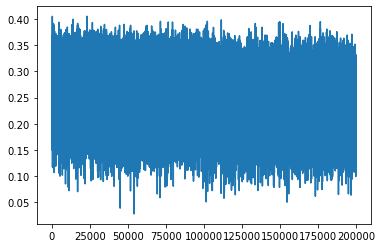

In [64]:
plt.plot(stepi, lossi)

In [69]:
emb = C[Xtr] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0706, grad_fn=<NllLossBackward0>)

In [70]:
emb = C[Xdev] # (num_of_examples, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (num_of_examples, 100)
logits = h @ W2 + b2 # (num_of_examples, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1398, grad_fn=<NllLossBackward0>)

In [72]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(10):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d=dimensionality of embeddings)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmahela.
jharlikimree.
taty.
halaysie.
rah.
bradveryn.
jareen.
nellara.
chaigh.
kaleigh.
